In [1]:
import numpy as np
import pandas as pd
import re
import os
import numpy as np
import matplotlib.pyplot as plt

#from src.data.make_dataset import *
from src.data.get_historical_tweets import *

%reload_ext autoreload
%autoreload 1

dict_keys(['consumer_key', 'consumer_secret', 'access_key', 'access_secret'])


In [2]:
test()

getting tweets before 1131386418410999807
...400 tweets downloaded so far
getting tweets before 1127522225224146948
...599 tweets downloaded so far
getting tweets before 1124672389416144904
...799 tweets downloaded so far
getting tweets before 1121049166615142399
...999 tweets downloaded so far
getting tweets before 1116689098385784831
...1199 tweets downloaded so far
getting tweets before 1110200331328208896
...1399 tweets downloaded so far
getting tweets before 1104601059425693695
...1599 tweets downloaded so far
getting tweets before 1098740934588751871
...1798 tweets downloaded so far
getting tweets before 1090078588748087295
...1998 tweets downloaded so far
getting tweets before 1084586625672376321
...2198 tweets downloaded so far
getting tweets before 1076658521926655999
...2398 tweets downloaded so far
getting tweets before 1069584730880974848
...2597 tweets downloaded so far
getting tweets before 1060938144336367615
...2797 tweets downloaded so far
getting tweets before 1056180

In [3]:
amzn_og = pd.read_csv('../../data/raw/AMZN.csv')

In [4]:
amzn = amzn_og.copy()

In [5]:
amzn.head()

Date        Open         High         Low       Close   Adj Close  \
0  2017-05-23  975.020020   975.200012  966.849976  971.539978  971.539978   
1  2017-05-24  976.000000   981.000000  970.229980  980.349976  980.349976   
2  2017-05-25  984.849976   999.000000  982.109985  993.380005  993.380005   
3  2017-05-26  995.000000   998.650024  989.250000  995.780029  995.780029   
4  2017-05-30  996.510010  1001.200012  995.520020  996.700012  996.700012   

    Volume  
0  2415600  
1  2446000  
2  4822000  
3  3469200  
4  3263100

In [6]:
amzn.describe().T

count          mean           std           min           25%  \
Open       503.0  1.475967e+03  3.353957e+02  9.400000e+02  1.130135e+03   
High       503.0  1.490664e+03  3.393700e+02  9.486300e+02  1.139350e+03   
Low        503.0  1.457952e+03  3.305736e+02  9.270000e+02  1.125275e+03   
Close      503.0  1.475094e+03  3.349681e+02  9.386000e+02  1.135395e+03   
Adj Close  503.0  1.475094e+03  3.349681e+02  9.386000e+02  1.135395e+03   
Volume     503.0  4.850894e+06  2.390832e+06  1.585100e+06  3.136700e+06   

                    50%           75%           max  
Open       1.575990e+03  1.738260e+03  2.038110e+03  
High       1.588500e+03  1.758095e+03  2.050500e+03  
Low        1.559080e+03  1.712265e+03  2.013000e+03  
Close      1.576120e+03  1.740585e+03  2.039510e+03  
Adj Close  1.576120e+03  1.740585e+03  2.039510e+03  
Volume     4.204400e+06  5.892200e+06  1.656500e+07

In [7]:
amzn

Date         Open         High          Low        Close  \
0    2017-05-23   975.020020   975.200012   966.849976   971.539978   
1    2017-05-24   976.000000   981.000000   970.229980   980.349976   
2    2017-05-25   984.849976   999.000000   982.109985   993.380005   
3    2017-05-26   995.000000   998.650024   989.250000   995.780029   
4    2017-05-30   996.510010  1001.200012   995.520020   996.700012   
5    2017-05-31  1000.000000  1000.119995   982.159973   994.619995   
6    2017-06-01   998.590027   998.989990   991.369995   995.950012   
7    2017-06-02   998.989990  1008.479980   995.669983  1006.729980   
8    2017-06-05  1007.229980  1013.210022  1003.510010  1011.340027   
9    2017-06-06  1012.000000  1016.500000  1001.250000  1003.000000   
10   2017-06-07  1005.950012  1010.250000  1002.000000  1010.070007   
11   2017-06-08  1012.059998  1013.609985  1006.109985  1010.270020   
12   2017-06-09  1012.500000  1012.989990   927.000000   978.309998   
13   2017-06-12   967.000000   975.950012   945.000000   964.909973   
14   2017-06-13   977.989990   984.500000   966.099976   980.789978   
15   2017-06-14   988.590027   990.340027   966.710022   976.469971   
16   2017-06-15   958.700012   965.729980   950.859985   964.169983   
17   2017-06-16   996.000000   999.750000   982.000000   987.710022   
18   2017-06-19  1017.000000  1017.000000   989.900024   995.169983   
19   2017-06-20   998.000000  1004.880005   992.020020   992.590027   
20   2017-06-21   998.700012  1002.719971   992.650024  1002.229980   
21   2017-06-22  1002.229980  1006.960022   997.200012  1001.299988   
22   2017-06-23  1002.539978  1004.619995   998.020020  1003.739990   
23   2017-06-26  1008.500000  1009.799988   992.000000   993.979980   
24   2017-06-27   990.690002   998.799988   976.000000   976.780029   
25   2017-06-28   978.549988   990.679993   969.210022   990.330017   
26   2017-06-29   979.000000   987.559998   965.250000   975.929993   
27   2017-06-30   980.119995   983.469971   967.609985   968.000000   
28   2017-07-03   972.789978   974.489990   951.000000   953.659973   
29   2017-07-05   961.530029   975.000000   955.250000   971.400024   
..          ...          ...          ...          ...          ...   
473  2019-04-10  1841.000000  1848.000000  1828.810059  1847.329956   
474  2019-04-11  1848.699951  1849.949951  1840.310059  1844.069946   
475  2019-04-12  1848.400024  1851.500000  1841.300049  1843.060059   
476  2019-04-15  1842.000000  1846.849976  1818.900024  1844.869995   
477  2019-04-16  1851.349976  1869.770020  1848.000000  1863.040039   
478  2019-04-17  1872.989990  1876.469971  1860.439941  1864.819946   
479  2019-04-18  1868.790039  1870.819946  1859.479980  1861.689941   
480  2019-04-22  1855.400024  1888.420044  1845.640015  1887.310059   
481  2019-04-23  1891.199951  1929.260010  1889.579956  1923.770020   
482  2019-04-24  1925.000000  1929.689941  1898.160034  1901.750000   
483  2019-04-25  1917.000000  1922.449951  1900.310059  1902.250000   
484  2019-04-26  1929.000000  1951.000000  1898.000000  1950.630005   
485  2019-04-29  1949.000000  1956.339966  1934.089966  1938.430054   
486  2019-04-30  1930.099976  1935.709961  1906.949951  1926.520020   
487  2019-05-01  1933.089966  1943.640015  1910.550049  1911.520020   
488  2019-05-02  1913.329956  1921.550049  1881.869995  1900.819946   
489  2019-05-03  1949.000000  1964.400024  1936.000000  1962.459961   
490  2019-05-06  1917.979980  1959.000000  1910.500000  1950.550049   
491  2019-05-07  1939.989990  1949.099976  1903.380005  1921.000000   
492  2019-05-08  1918.869995  1935.369995  1910.000000  1917.770020   
493  2019-05-09  1900.000000  1909.400024  1876.000000  1899.869995   
494  2019-05-10  1898.000000  1903.790039  1856.000000  1889.979980   
495  2019-05-13  1836.560059  1846.540039  1818.000000  1822.680054   
496  2019-05-14  1839.500000  1852.439941  1815.750000  1840.119995   
497  2019-05-15  1827.949951  1874.

In [8]:
amzn['Change'] = [amzn.Close[i-1] - amzn.Close[i] for i in range(1,len(amzn.Close))] + [np.nan]

In [9]:
amzn.tail()

Date         Open         High          Low        Close  \
498  2019-05-16  1885.939941  1917.510010  1882.290039  1907.569946   
499  2019-05-17  1893.050049  1910.530029  1867.329956  1869.000000   
500  2019-05-20  1852.689941  1867.780029  1835.540039  1858.969971   
501  2019-05-21  1874.790039  1879.000000  1846.000000  1857.520020   
502  2019-05-22  1851.780029  1871.489990  1851.000000  1859.680054   

       Adj Close   Volume     Change  
498  1907.569946  4707800  38.569946  
499  1869.000000  4736600  10.030029  
500  1858.969971  3798200   1.449951  
501  1857.520020  4005100  -2.160034  
502  1859.680054  2931800        NaN

In [10]:
amzn['Pct_Change'] = [amzn.Change[i-1] / amzn.Close[i] for i in range(1,len(amzn.Close))] + [np.nan]

In [11]:
amzn[amzn.Change.isna() == True]

Date         Open        High     Low        Close    Adj Close  \
502  2019-05-22  1851.780029  1871.48999  1851.0  1859.680054  1859.680054   

      Volume  Change  Pct_Change  
502  2931800     NaN         NaN

In [12]:
#amzn = amzn.drop(index = 502)

In [13]:
amzn['Abs_Change'] = amzn.Change.abs()
amzn['Abs_Pct_Change'] = amzn.Pct_Change.abs()


In [14]:
amzn.describe()

Open         High          Low        Close    Adj Close  \
count   503.000000   503.000000   503.000000   503.000000   503.000000   
mean   1475.967455  1490.663599  1457.951691  1475.094135  1475.094135   
std     335.395722   339.370035   330.573624   334.968057   334.968057   
min     940.000000   948.630005   927.000000   938.599976   938.599976   
25%    1130.135010  1139.350036  1125.275024  1135.394959  1135.394959   
50%    1575.989990  1588.500000  1559.079956  1576.119995  1576.119995   
75%    1738.260009  1758.094971  1712.265014  1740.585022  1740.585022   
max    2038.109985  2050.500000  2013.000000  2039.510010  2039.510010   

             Volume      Change  Pct_Change  Abs_Change  Abs_Pct_Change  
count  5.030000e+02  502.000000  502.000000  502.000000      502.000000  
mean   4.850894e+06   -1.769203   -0.001103   20.066332        0.013287  
std    2.390832e+06   30.078577    0.019462   22.458756        0.014251  
min    1.585100e+06 -128.519958   -0.116736    0.000000        0.000000  
25%    3.136700e+06  -15.272430   -0.011068    5.484985        0.003842  
50%    4.204400e+06   -2.399963   -0.001578   12.339996        0.009139  
75%    5.892200e+06    9.610016    0.006499   25.942520        0.016506  
max    1.656500e+07  139.359985    0.084830  139.359985        0.116736

In [15]:
amzn[amzn.Date == '2017-08-16']

Date        Open        High         Low       Close   Adj Close  \
59  2017-08-16  981.650024  986.460022  973.219971  978.179993  978.179993   

     Volume     Change  Pct_Change  Abs_Change  Abs_Pct_Change  
59  3132100  17.609986    0.018333   17.609986        0.018333

In [16]:
amzn.loc[57:62,:]

Date        Open        High         Low       Close   Adj Close  \
57  2017-08-14  978.409973  985.500000  976.190002  983.299988  983.299988   
58  2017-08-15  988.900024  991.739990  982.000000  982.739990  982.739990   
59  2017-08-16  981.650024  986.460022  973.219971  978.179993  978.179993   
60  2017-08-17  977.840027  977.840027  960.320007  960.570007  960.570007   
61  2017-08-18  961.400024  965.429993  954.650024  958.469971  958.469971   
62  2017-08-21  957.570007  961.200012  945.460022  953.289978  953.289978   

     Volume     Change  Pct_Change  Abs_Change  Abs_Pct_Change  
57  3042800   0.559998    0.000570    0.559998        0.000570  
58  2549300   4.559997    0.004662    4.559997        0.004662  
59  3132100  17.609986    0.018333   17.609986        0.018333  
60  3512400   2.100036    0.002191    2.100036        0.002191  
61  3284800   5.179993    0.005434    5.179993        0.005434  
62  3164500 -13.610046   -0.014076   13.610046        0.014076

In [17]:
amzn.dtypes

Date               object
Open              float64
High              float64
Low               float64
Close             float64
Adj Close         float64
Volume              int64
Change            float64
Pct_Change        float64
Abs_Change        float64
Abs_Pct_Change    float64
dtype: object

In [18]:
#amzn.Date = pd.to_datetime(amzn.Date, unit='D')
amzn.Date = pd.to_datetime(amzn.Date)

In [19]:
dt_amzn = amzn.set_index('Date')

In [20]:
dt_amzn

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-05-23   975.020020   975.200012   966.849976   971.539978   971.539978   
2017-05-24   976.000000   981.000000   970.229980   980.349976   980.349976   
2017-05-25   984.849976   999.000000   982.109985   993.380005   993.380005   
2017-05-26   995.000000   998.650024   989.250000   995.780029   995.780029   
2017-05-30   996.510010  1001.200012   995.520020   996.700012   996.700012   
2017-05-31  1000.000000  1000.119995   982.159973   994.619995   994.619995   
2017-06-01   998.590027   998.989990   991.369995   995.950012   995.950012   
2017-06-02   998.989990  1008.479980   995.669983  1006.729980  1006.729980   
2017-06-05  1007.229980  1013.210022  1003.510010  1011.340027  1011.340027   
2017-06-06  1012.000000  1016.500000  1001.250000  1003.000000  1003.000000   
2017-06-07  1005.950012  1010.250000  1002.000000  1010.070007  1010.070007   
2017-06-08  1012.059998  1013.609985  1006.109985  1010.270020  1010.270020   
2017-06-09  1012.500000  1012.989990   927.000000   978.309998   978.309998   
2017-06-12   967.000000   975.950012   945.000000   964.909973   964.909973   
2017-06-13   977.989990   984.500000   966.099976   980.789978   980.789978   
2017-06-14   988.590027   990.340027   966.710022   976.469971   976.469971   
2017-06-15   958.700012   965.729980   950.859985   964.169983   964.169983   
2017-06-16   996.000000   999.750000   982.000000   987.710022   987.710022   
2017-06-19  1017.000000  1017.000000   989.900024   995.169983   995.169983   
2017-06-20   998.000000  1004.880005   992.020020   992.590027   992.590027   
2017-06-21   998.700012  1002.719971   992.650024  1002.229980  1002.229980   
2017-06-22  1002.229980  1006.960022   997.200012  1001.299988  1001.299988   
2017-06-23  1002.539978  1004.619995   998.020020  1003.739990  1003.739990   
2017-06-26  1008.500000  1009.799988   992.000000   993.979980   993.979980   
2017-06-27   990.690002   998.799988   976.000000   976.780029   976.780029   
2017-06-28   978.549988   990.679993   969.210022   990.330017   990.330017   
2017-06-29   979.000000   987.559998   965.250000   975.929993   975.929993   
2017-06-30   980.119995   983.469971   967.609985   968.000000   968.000000   
2017-07-03   972.789978   974.489990   951.000000   953.659973   953.659973   
2017-07-05   961.530029   975.000000   955.250000   971.400024   971.400024   
...                 ...          ...          ...          ...          ...   
2019-04-10  1841.000000  1848.000000  1828.810059  1847.329956  1847.329956   
2019-04-11  1848.699951  1849.949951  1840.310059  1844.069946  1844.069946   
2019-04-12  1848.400024  1851.500000  1841.300049  1843.060059  1843.060059   
2019-04-15  1842.000000  1846.849976  1818.900024  1844.869995  1844.869995   
2019-04-16  1851.349976  1869.770020  1848.000000  1863.040039  1863.040039   
2019-04-17  1872.989990  1876.469971  1860.439941  1864.819946  1864.819946   
2019-04-18  1868.790039  1870.819946  1859.479980  1861.689941  1861.689941   
2019-04-22  1855.400024  1888.420044  1845.640015  1887.310059  1887.310059   
2019-04-23  1891.199951  1929.260010  1889.579956  1923.770020  1923.770020   
2019-04-24  1925.000000  1929.689941  1898.160034  1901.750000  1901.750000   
2019-04-25  1917.000000  1922.449951  1900.310059  1902.250000  1902.250000   
2019-04-26  1929.000000  1951.000000  1898.000000  1950.630005  1950.630005   
2019-04-29  1949.000000  1956.339966  1934.089966  1938.430054  1938.430054   
2019-04-30  1930.099976  1935.709961  1906.949951  1926.520020  1926.520020   
2019-05-01  1933.089966  1943.640015  1910.550049  1911.520020  1911.520020   
2019-05-02  1913.329956  1921.550049  1881.869995  1900.819946  1900.819946   
2019-05-03  1949.000000  1964.400024  1936.000000  1962.459961  1962.459961   
2019-05-06  1917.979980  1959.000000  1910.500000  1950.550049  1950.

In [21]:
#2 Day Average Change is the average of 2 days of change. (i.e. monday to tuesday and tuesday to wednesday)

In [22]:
dt_amzn['2_Day_Avg_Change'] = dt_amzn.Change.rolling(2).mean()

In [23]:
dt_amzn['2_Day_Avg_Change']

Date
2017-05-23          NaN
2017-05-24   -10.920014
2017-05-25    -7.715026
2017-05-26    -1.660003
2017-05-30     0.580017
2017-05-31     0.375000
2017-06-01    -6.054993
2017-06-02    -7.695008
2017-06-05     1.864990
2017-06-06     0.635010
2017-06-07    -3.635010
2017-06-08    15.880004
2017-06-09    22.680023
2017-06-12    -1.239990
2017-06-13    -5.779999
2017-06-14     8.309997
2017-06-15    -5.620025
2017-06-16   -15.500000
2017-06-19    -2.440002
2017-06-20    -3.529999
2017-06-21    -4.354981
2017-06-22    -0.755005
2017-06-23     3.660004
2017-06-26    13.479981
2017-06-27     1.824982
2017-06-28     0.425018
2017-06-29    11.165008
2017-06-30    11.135010
2017-07-03    -1.700012
2017-07-05    -5.740021
                ...    
2019-04-10    -4.114990
2019-04-11     2.134948
2019-04-12    -0.400024
2019-04-15    -9.989990
2019-04-16    -9.974976
2019-04-17     0.675049
2019-04-18   -11.245056
2019-04-22   -31.040039
2019-04-23    -7.219971
2019-04-24    10.760010
2019-04-25 

In [24]:
dt_amzn[(dt_amzn.index.month == 7) & (dt_amzn.index.year == 2018)]

Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-07-02  1682.699951  1713.890015  1678.060059  1713.780029  1713.780029   
2018-07-03  1723.959961  1725.000000  1692.479980  1693.959961  1693.959961   
2018-07-05  1705.380005  1710.689941  1682.150024  1699.729980  1699.729980   
2018-07-06  1696.000000  1715.270020  1691.670044  1710.630005  1710.630005   
2018-07-09  1724.050049  1739.560059  1716.229980  1739.020020  1739.020020   
2018-07-10  1738.530029  1750.000000  1731.000000  1743.069946  1743.069946   
2018-07-11  1737.989990  1756.959961  1734.000000  1755.000000  1755.000000   
2018-07-12  1764.510010  1798.000000  1762.180054  1796.619995  1796.619995   
2018-07-13  1803.930054  1815.300049  1795.229980  1813.030029  1813.030029   
2018-07-16  1821.949951  1841.949951  1814.449951  1822.489990  1822.489990   
2018-07-17  1811.560059  1851.689941  1797.380005  1843.930054  1843.930054   
2018-07-18  1848.000000  1858.880005  1831.270020  1842.920044  1842.920044   
2018-07-19  1829.459961  1841.000000  1811.270020  1812.969971  1812.969971   
2018-07-20  1825.010010  1834.839966  1810.060059  1813.699951  1813.699951   
2018-07-23  1812.209961  1819.000000  1769.989990  1802.000000  1802.000000   
2018-07-24  1829.010010  1840.000000  1809.380005  1829.239990  1829.239990   
2018-07-25  1829.300049  1863.839966  1822.640015  1863.609985  1863.609985   
2018-07-26  1839.000000  1844.680054  1804.500000  1808.000000  1808.000000   
2018-07-27  1876.050049  1880.050049  1806.530029  1817.270020  1817.270020   
2018-07-30  1827.329956  1829.500000  1766.020020  1779.219971  1779.219971   
2018-07-31  1786.489990  1801.829956  1739.319946  1777.439941  1777.439941   

             Volume     Change  Pct_Change  Abs_Change  Abs_Pct_Change  \
Date                                                                     
2018-07-02  3185700  19.820068    0.011700   19.820068        0.011700   
2018-07-03  2177300  -5.770019   -0.003395    5.770019        0.003395   
2018-07-05  2983100 -10.900025   -0.006372   10.900025        0.006372   
2018-07-06  2650300 -28.390015   -0.016325   28.390015        0.016325   
2018-07-09  3012000  -4.049926   -0.002323    4.049926        0.002323   
2018-07-10  3002900 -11.930054   -0.006798   11.930054        0.006798   
2018-07-11  3209800 -41.619995   -0.023166   41.619995        0.023166   
2018-07-12  4532700 -16.410034   -0.009051   16.410034        0.009051   
2018-07-13  4383200  -9.459961   -0.005191    9.459961        0.005191   
2018-07-16  5466200 -21.440064   -0.011627   21.440064        0.011627   
2018-07-17  5682900   1.010010    0.000548    1.010010        0.000548   
2018-07-18  4861900  29.950073    0.016520   29.950073        0.016520   
2018-07-19  4676900  -0.729980   -0.000402    0.729980        0.000402   
2018-07-20  3884400  11.699951    0.006493   11.699951        0.006493   
2018-07-23  3888500 -27.239990   -0.014891   27.239990        0.014891   
2018-07-24  4278700 -34.369995   -0.018443   34.369995        0.018443   
2018-07-25  3738200  55.609985    0.030758   55.609985        0.030758   
2018-07-26  9924400  -9.270020   -0.005101    9.270020        0.005101   
2018-07-27  9681000  38.050049    0.021386   38.050049        0.021386   
2018-07-30  6562300   1.780030    0.001001    1.780030        0.001001   
2018-07-31  5738700 -19.730103   -0.010978   19.730103        0.010978   

            2_Day_Avg_Change  
Date                          
2018-07-02          2.920044  
2018-07-03          7.025024  
2018-07-05         -8.335022  
2018-07-06        -19.645020  
2018-07-09        -16.219971  
2018-07-10         -7.989990  
2018-07-11        -26.775024  
2018-07-12        -29.015015  
2018-07-13        -12.934997  
2018-07-16        -15.450012  
2018-07-17        -10.215027  
2018-07-18         15.480041  
2018-07-19         14.610047  
2018-07-20          5.484985  
20

In [25]:
dt_amzn['2_Day_Pct_Change'] = dt_amzn.Close.pct_change(periods = 2) #percent change two days later

In [26]:
dt_amzn

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-05-23   975.020020   975.200012   966.849976   971.539978   971.539978   
2017-05-24   976.000000   981.000000   970.229980   980.349976   980.349976   
2017-05-25   984.849976   999.000000   982.109985   993.380005   993.380005   
2017-05-26   995.000000   998.650024   989.250000   995.780029   995.780029   
2017-05-30   996.510010  1001.200012   995.520020   996.700012   996.700012   
2017-05-31  1000.000000  1000.119995   982.159973   994.619995   994.619995   
2017-06-01   998.590027   998.989990   991.369995   995.950012   995.950012   
2017-06-02   998.989990  1008.479980   995.669983  1006.729980  1006.729980   
2017-06-05  1007.229980  1013.210022  1003.510010  1011.340027  1011.340027   
2017-06-06  1012.000000  1016.500000  1001.250000  1003.000000  1003.000000   
2017-06-07  1005.950012  1010.250000  1002.000000  1010.070007  1010.070007   
2017-06-08  1012.059998  1013.609985  1006.109985  1010.270020  1010.270020   
2017-06-09  1012.500000  1012.989990   927.000000   978.309998   978.309998   
2017-06-12   967.000000   975.950012   945.000000   964.909973   964.909973   
2017-06-13   977.989990   984.500000   966.099976   980.789978   980.789978   
2017-06-14   988.590027   990.340027   966.710022   976.469971   976.469971   
2017-06-15   958.700012   965.729980   950.859985   964.169983   964.169983   
2017-06-16   996.000000   999.750000   982.000000   987.710022   987.710022   
2017-06-19  1017.000000  1017.000000   989.900024   995.169983   995.169983   
2017-06-20   998.000000  1004.880005   992.020020   992.590027   992.590027   
2017-06-21   998.700012  1002.719971   992.650024  1002.229980  1002.229980   
2017-06-22  1002.229980  1006.960022   997.200012  1001.299988  1001.299988   
2017-06-23  1002.539978  1004.619995   998.020020  1003.739990  1003.739990   
2017-06-26  1008.500000  1009.799988   992.000000   993.979980   993.979980   
2017-06-27   990.690002   998.799988   976.000000   976.780029   976.780029   
2017-06-28   978.549988   990.679993   969.210022   990.330017   990.330017   
2017-06-29   979.000000   987.559998   965.250000   975.929993   975.929993   
2017-06-30   980.119995   983.469971   967.609985   968.000000   968.000000   
2017-07-03   972.789978   974.489990   951.000000   953.659973   953.659973   
2017-07-05   961.530029   975.000000   955.250000   971.400024   971.400024   
...                 ...          ...          ...          ...          ...   
2019-04-10  1841.000000  1848.000000  1828.810059  1847.329956  1847.329956   
2019-04-11  1848.699951  1849.949951  1840.310059  1844.069946  1844.069946   
2019-04-12  1848.400024  1851.500000  1841.300049  1843.060059  1843.060059   
2019-04-15  1842.000000  1846.849976  1818.900024  1844.869995  1844.869995   
2019-04-16  1851.349976  1869.770020  1848.000000  1863.040039  1863.040039   
2019-04-17  1872.989990  1876.469971  1860.439941  1864.819946  1864.819946   
2019-04-18  1868.790039  1870.819946  1859.479980  1861.689941  1861.689941   
2019-04-22  1855.400024  1888.420044  1845.640015  1887.310059  1887.310059   
2019-04-23  1891.199951  1929.260010  1889.579956  1923.770020  1923.770020   
2019-04-24  1925.000000  1929.689941  1898.160034  1901.750000  1901.750000   
2019-04-25  1917.000000  1922.449951  1900.310059  1902.250000  1902.250000   
2019-04-26  1929.000000  1951.000000  1898.000000  1950.630005  1950.630005   
2019-04-29  1949.000000  1956.339966  1934.089966  1938.430054  1938.430054   
2019-04-30  1930.099976  1935.709961  1906.949951  1926.520020  1926.520020   
2019-05-01  1933.089966  1943.640015  1910.550049  1911.520020  1911.520020   
2019-05-02  1913.329956  1921.550049  1881.869995  1900.819946  1900.819946   
2019-05-03  1949.000000  1964.400024  1936.000000  1962.459961  1962.459961   
2019-05-06  1917.979980  1959.000000  1910.500000  1950.550049  1950.

In [27]:
dt_amzn['2_Day_Avg_Pct_Change'] = dt_amzn['2_Day_Pct_Change'] / 2 #avg daily percent change two days later

In [28]:
dt_amzn

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-05-23   975.020020   975.200012   966.849976   971.539978   971.539978   
2017-05-24   976.000000   981.000000   970.229980   980.349976   980.349976   
2017-05-25   984.849976   999.000000   982.109985   993.380005   993.380005   
2017-05-26   995.000000   998.650024   989.250000   995.780029   995.780029   
2017-05-30   996.510010  1001.200012   995.520020   996.700012   996.700012   
2017-05-31  1000.000000  1000.119995   982.159973   994.619995   994.619995   
2017-06-01   998.590027   998.989990   991.369995   995.950012   995.950012   
2017-06-02   998.989990  1008.479980   995.669983  1006.729980  1006.729980   
2017-06-05  1007.229980  1013.210022  1003.510010  1011.340027  1011.340027   
2017-06-06  1012.000000  1016.500000  1001.250000  1003.000000  1003.000000   
2017-06-07  1005.950012  1010.250000  1002.000000  1010.070007  1010.070007   
2017-06-08  1012.059998  1013.609985  1006.109985  1010.270020  1010.270020   
2017-06-09  1012.500000  1012.989990   927.000000   978.309998   978.309998   
2017-06-12   967.000000   975.950012   945.000000   964.909973   964.909973   
2017-06-13   977.989990   984.500000   966.099976   980.789978   980.789978   
2017-06-14   988.590027   990.340027   966.710022   976.469971   976.469971   
2017-06-15   958.700012   965.729980   950.859985   964.169983   964.169983   
2017-06-16   996.000000   999.750000   982.000000   987.710022   987.710022   
2017-06-19  1017.000000  1017.000000   989.900024   995.169983   995.169983   
2017-06-20   998.000000  1004.880005   992.020020   992.590027   992.590027   
2017-06-21   998.700012  1002.719971   992.650024  1002.229980  1002.229980   
2017-06-22  1002.229980  1006.960022   997.200012  1001.299988  1001.299988   
2017-06-23  1002.539978  1004.619995   998.020020  1003.739990  1003.739990   
2017-06-26  1008.500000  1009.799988   992.000000   993.979980   993.979980   
2017-06-27   990.690002   998.799988   976.000000   976.780029   976.780029   
2017-06-28   978.549988   990.679993   969.210022   990.330017   990.330017   
2017-06-29   979.000000   987.559998   965.250000   975.929993   975.929993   
2017-06-30   980.119995   983.469971   967.609985   968.000000   968.000000   
2017-07-03   972.789978   974.489990   951.000000   953.659973   953.659973   
2017-07-05   961.530029   975.000000   955.250000   971.400024   971.400024   
...                 ...          ...          ...          ...          ...   
2019-04-10  1841.000000  1848.000000  1828.810059  1847.329956  1847.329956   
2019-04-11  1848.699951  1849.949951  1840.310059  1844.069946  1844.069946   
2019-04-12  1848.400024  1851.500000  1841.300049  1843.060059  1843.060059   
2019-04-15  1842.000000  1846.849976  1818.900024  1844.869995  1844.869995   
2019-04-16  1851.349976  1869.770020  1848.000000  1863.040039  1863.040039   
2019-04-17  1872.989990  1876.469971  1860.439941  1864.819946  1864.819946   
2019-04-18  1868.790039  1870.819946  1859.479980  1861.689941  1861.689941   
2019-04-22  1855.400024  1888.420044  1845.640015  1887.310059  1887.310059   
2019-04-23  1891.199951  1929.260010  1889.579956  1923.770020  1923.770020   
2019-04-24  1925.000000  1929.689941  1898.160034  1901.750000  1901.750000   
2019-04-25  1917.000000  1922.449951  1900.310059  1902.250000  1902.250000   
2019-04-26  1929.000000  1951.000000  1898.000000  1950.630005  1950.630005   
2019-04-29  1949.000000  1956.339966  1934.089966  1938.430054  1938.430054   
2019-04-30  1930.099976  1935.709961  1906.949951  1926.520020  1926.520020   
2019-05-01  1933.089966  1943.640015  1910.550049  1911.520020  1911.520020   
2019-05-02  1913.329956  1921.550049  1881.869995  1900.819946  1900.819946   
2019-05-03  1949.000000  1964.400024  1936.000000  1962.459961  1962.459961   
2019-05-06  1917.979980  1959.000000  1910.500000  1950.550049  1950.

In [29]:
dt_amzn.describe().T

count          mean           std           min  \
Open                  503.0  1.475967e+03  3.353957e+02  9.400000e+02   
High                  503.0  1.490664e+03  3.393700e+02  9.486300e+02   
Low                   503.0  1.457952e+03  3.305736e+02  9.270000e+02   
Close                 503.0  1.475094e+03  3.349681e+02  9.386000e+02   
Adj Close             503.0  1.475094e+03  3.349681e+02  9.386000e+02   
Volume                503.0  4.850894e+06  2.390832e+06  1.585100e+06   
Change                502.0 -1.769203e+00  3.007858e+01 -1.285200e+02   
Pct_Change            502.0 -1.103060e-03  1.946159e-02 -1.167355e-01   
Abs_Change            502.0  2.006633e+01  2.245876e+01  0.000000e+00   
Abs_Pct_Change        502.0  1.328696e-02  1.425051e-02  0.000000e+00   
2_Day_Avg_Change      501.0 -1.761787e+00  2.094731e+01 -6.920999e+01   
2_Day_Pct_Change      501.0  2.950416e-03  2.744066e-02 -1.365134e-01   
2_Day_Avg_Pct_Change  501.0  1.475208e-03  1.372033e-02 -6.825669e-02   

                               25%           50%           75%           max  
Open                  1.130135e+03  1.575990e+03  1.738260e+03  2.038110e+03  
High                  1.139350e+03  1.588500e+03  1.758095e+03  2.050500e+03  
Low                   1.125275e+03  1.559080e+03  1.712265e+03  2.013000e+03  
Close                 1.135395e+03  1.576120e+03  1.740585e+03  2.039510e+03  
Adj Close             1.135395e+03  1.576120e+03  1.740585e+03  2.039510e+03  
Volume                3.136700e+06  4.204400e+06  5.892200e+06  1.656500e+07  
Change               -1.527243e+01 -2.399963e+00  9.610016e+00  1.393600e+02  
Pct_Change           -1.106806e-02 -1.577891e-03  6.498942e-03  8.483025e-02  
Abs_Change            5.484985e+00  1.234000e+01  2.594252e+01  1.393600e+02  
Abs_Pct_Change        3.841639e-03  9.139455e-03  1.650617e-02  1.167355e-01  
2_Day_Avg_Change     -1.187500e+01 -3.255005e+00  7.010010e+00  1.216450e+02  
2_Day_Pct_Change     -1.029653e-02  4.940807e-03  1.704331e-02  1.423444e-01  
2_Day_Avg_Pct_Change -5.148266e-03  2.470404e-03  8.521653e-03  7.117221e-02

In [30]:
july18_amzn = dt_amzn[(dt_amzn.index.month == 7) & (dt_amzn.index.year == 2018)]

In [31]:
july18_amzn.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-07-02  1682.699951  1713.890015  1678.060059  1713.780029  1713.780029   
2018-07-03  1723.959961  1725.000000  1692.479980  1693.959961  1693.959961   
2018-07-05  1705.380005  1710.689941  1682.150024  1699.729980  1699.729980   
2018-07-06  1696.000000  1715.270020  1691.670044  1710.630005  1710.630005   
2018-07-09  1724.050049  1739.560059  1716.229980  1739.020020  1739.020020   

             Volume     Change  Pct_Change  Abs_Change  Abs_Pct_Change  \
Date                                                                     
2018-07-02  3185700  19.820068    0.011700   19.820068        0.011700   
2018-07-03  2177300  -5.770019   -0.003395    5.770019        0.003395   
2018-07-05  2983100 -10.900025   -0.006372   10.900025        0.006372   
2018-07-06  2650300 -28.390015   -0.016325   28.390015        0.016325   
2018-07-09  3012000  -4.049926   -0.002323    4.049926        0.002323   

            2_Day_Avg_Change  2_Day_Pct_Change  2_Day_Avg_Pct_Change  
Date                                                                  
2018-07-02          2.920044          0.007247              0.003623  
2018-07-03          7.025024         -0.003436             -0.001718  
2018-07-05         -8.335022         -0.008198             -0.004099  
2018-07-06        -19.645020          0.009841              0.004920  
2018-07-09        -16.219971          0.023115              0.011558

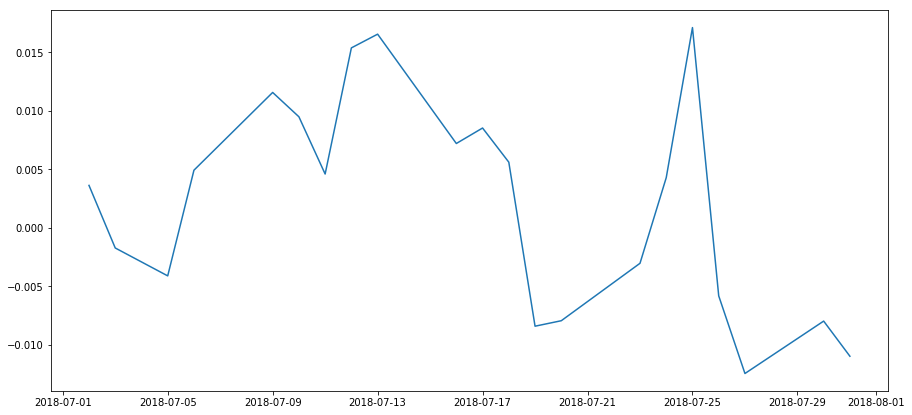

In [32]:
plt.figure(figsize=(15,7))
plt.plot(july18_amzn['2_Day_Avg_Pct_Change'])

In [33]:
summer18_amzn = dt_amzn[(dt_amzn.index.month >= 6) & (dt_amzn.index.month < 9) & (dt_amzn.index.year == 2018)]

In [34]:
jun_aug18_amzn = dt_amzn[(dt_amzn.index.month >= 5) & (dt_amzn.index.month < 9) & (dt_amzn.index.year == 2018)]

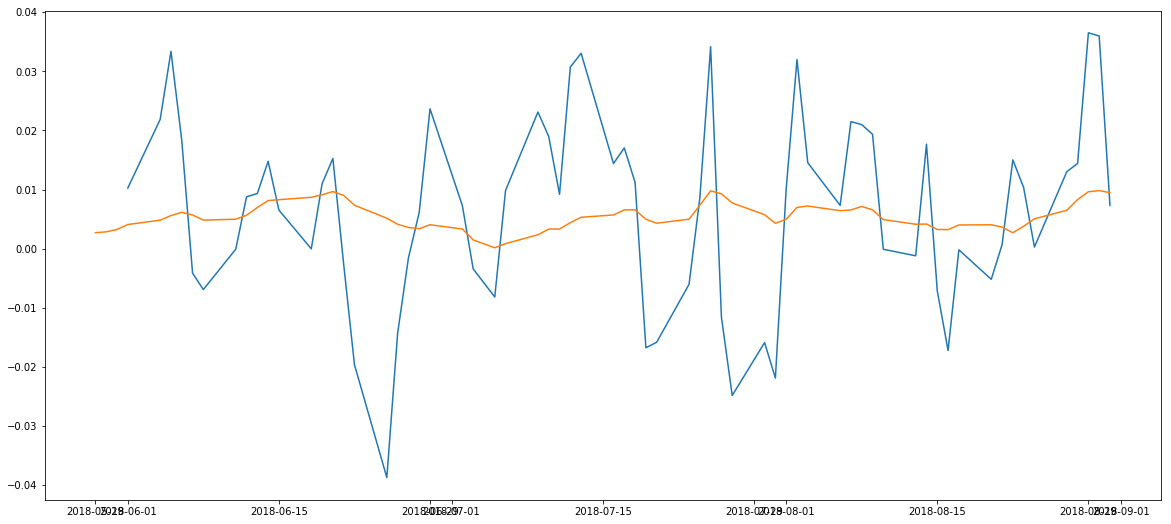

In [35]:
plt.figure(figsize=(20,9))
plt.plot(summer18_amzn['2_Day_Pct_Change'])
plt.plot(jun_aug18_amzn['2_Day_Pct_Change'].rolling(20).mean())
#plt.plot(jun_aug18_amzn['2_Day_Pct_Change'].rolling(15).mean())

In [36]:
#build a function to do all this for k specified days
#should note down dates where its generally accepted that trump tweets had an effect on amazon stock
#reorganize/consolidate this code into the "Clean Notebook" with markdown notes

Next Steps:

-Build a function to get the stock's Rolling Average Percent Change for k specified days. Maybe even include plotting those values alongside a 1 month (or approx 20 weekdays) rolling average to find noticeable changes.

-Should research and note down dates where it's generally accepted that Trump's tweets had an effect on amazon stock.

-Need to reorganize/consolidate the code from the "Rough Notebook" into the "Clean Notebook" with markdown notes.

In [37]:
#article mentioned the .rolling_mean() and .rolling_std() and etc functions but says they will soon be depreciated 
#so its better to do a combination of .rolling() with .mean() or .std() or etc

In [38]:
dt_amzn[((dt_amzn.index.month == 3) | (dt_amzn.index.month == 4)) & (dt_amzn.index.year == 2018)]

Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-03-01  1513.599976  1518.489990  1465.000000  1493.449951  1493.449951   
2018-03-02  1469.099976  1501.050049  1455.010010  1500.250000  1500.250000   
2018-03-05  1494.239990  1525.380005  1481.000000  1523.609985  1523.609985   
2018-03-06  1533.199951  1542.130005  1528.000000  1537.640015  1537.640015   
2018-03-07  1526.520020  1545.900024  1522.510010  1545.000000  1545.000000   
2018-03-08  1550.000000  1554.880005  1545.250000  1551.859985  1551.859985   
2018-03-09  1563.500000  1578.939941  1559.079956  1578.890015  1578.890015   
2018-03-12  1592.599976  1605.329956  1586.699951  1598.390015  1598.390015   
2018-03-13  1615.959961  1617.540039  1578.010010  1588.180054  1588.180054   
2018-03-14  1597.000000  1606.439941  1590.890015  1591.000000  1591.000000   
2018-03-15  1595.000000  1596.910034  1578.109985  1582.319946  1582.319946   
2018-03-16  1583.449951  1589.439941  1567.500000  1571.680054  1571.680054   
2018-03-19  1554.530029  1561.660034  1525.349976  1544.930054  1544.930054   
2018-03-20  1550.339966  1587.000000  1545.410034  1586.510010  1586.510010   
2018-03-21  1586.449951  1590.000000  1563.170044  1581.859985  1581.859985   
2018-03-22  1565.469971  1573.849976  1542.400024  1544.920044  1544.920044   
2018-03-23  1539.010010  1549.020020  1495.359985  1495.560059  1495.560059   
2018-03-26  1530.000000  1556.989990  1499.250000  1555.859985  1555.859985   
2018-03-27  1572.400024  1575.969971  1482.319946  1497.050049  1497.050049   
2018-03-28  1447.000000  1455.900024  1386.170044  1431.420044  1431.420044   
2018-03-29  1406.000000  1455.469971  1365.199951  1447.339966  1447.339966   
2018-04-02  1417.619995  1421.359985  1355.000000  1371.989990  1371.989990   
2018-04-03  1391.380005  1414.000000  1355.329956  1392.050049  1392.050049   
2018-04-04  1358.239990  1415.390015  1352.880005  1410.569946  1410.569946   
2018-04-05  1441.989990  1459.560059  1427.069946  1451.750000  1451.750000   
2018-04-06  1429.969971  1452.500000  1400.260010  1405.229980  1405.229980   
2018-04-09  1425.030029  1438.479980  1402.569946  1406.079956  1406.079956   
2018-04-10  1431.989990  1438.380005  1415.699951  1436.219971  1436.219971   
2018-04-11  1439.439941  1448.780029  1424.890015  1427.050049  1427.050049   
2018-04-12  1439.500000  1452.119995  1435.060059  1448.500000  1448.500000   
2018-04-13  1449.140015  1459.780029  1424.520020  1430.790039  1430.790039   
2018-04-16  1445.000000  1447.000000  1427.479980  1441.500000  1441.500000   
2018-04-17  1462.300049  1507.189941  1457.020020  1503.829956  1503.829956   
2018-04-18  1514.650024  1533.800049  1504.109985  1527.839966  1527.839966   
2018-04-19  1543.219971  1568.520020  1539.060059  1556.910034  1556.910034   
2018-04-20  1561.199951  1561.199951  1516.089966  1527.489990  1527.489990   
2018-04-23  1546.689941  1548.000000  1503.410034  1517.859985  1517.859985   
2018-04-24  1535.800049  1539.500000  1448.449951  1460.089966  1460.089966   
2018-04-25  1458.000000  1469.989990  1415.020020  1460.170044  1460.170044   
2018-04-26  1485.010010  1529.420044  1478.500000  1517.959961  1517.959961   
2018-04-27  1634.010010  1638.099976  1567.390015  1572.619995  1572.619995   
2018-04-30  1582.500000  1596.000000  1560.939941  1566.130005  1566.130005   

              Volume     Change  Pct_Change  Abs_Change  Abs_Pct_Change  \
Date                                                                      
2018-03-01   6835200  -6.800049   -0.004533    6.800049        0.004533   
2018-03-02   6587600 -23.359985   -0.015332   23.359985        0.015332   
2018-03-05   5233900 -14.030030   -0.009124   14.030030        0.009124   
2018-03-06   4561700  -7.359985   -0.004764    7.359985        0.004764   
2018-03-07   4174100  -6.859985   -0.004420    6.859985        0.004420   
2018-03-08   3862

In [39]:
#can look at /\ of a days highs and lows
# can look at /\ of a days open and close
# look at high volume

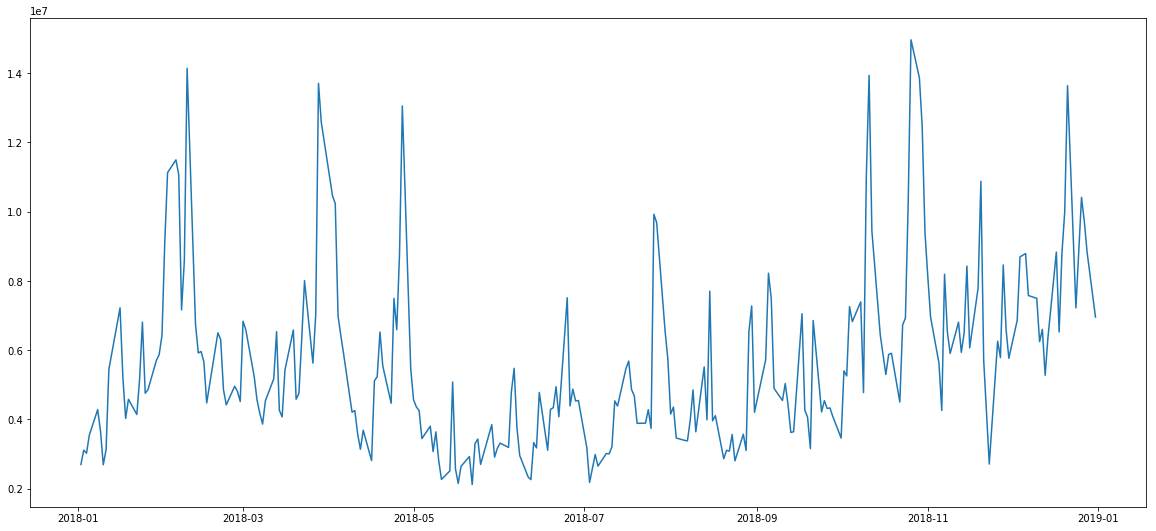

In [40]:
plt.figure(figsize=(20,9))
plt.plot(dt_amzn[dt_amzn.index.year == 2018].Volume)

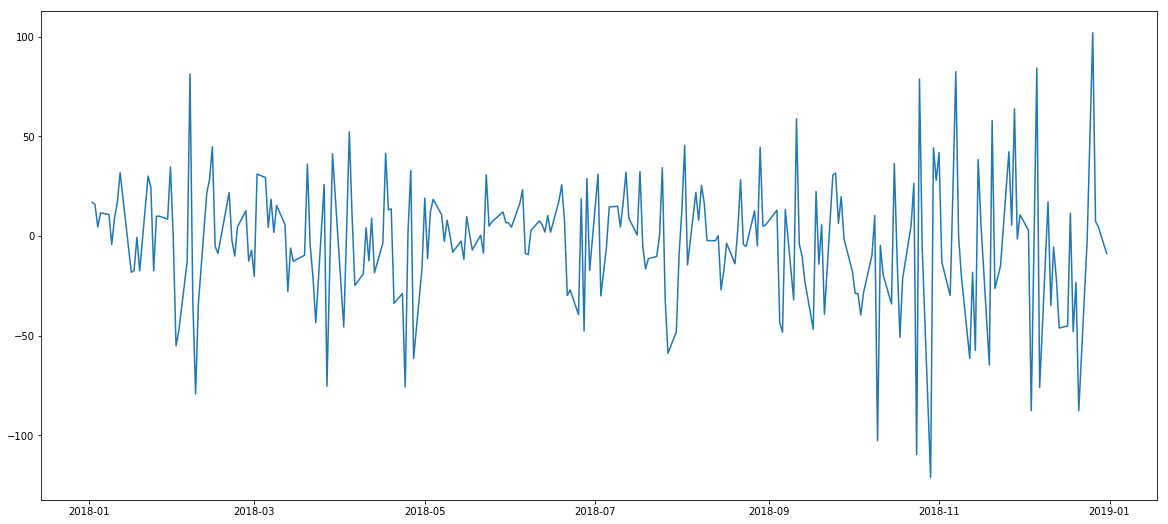

In [41]:
plt.figure(figsize=(20,9))
plt.plot(dt_amzn[dt_amzn.index.year == 2018].Close - dt_amzn[dt_amzn.index.year == 2018].Open)

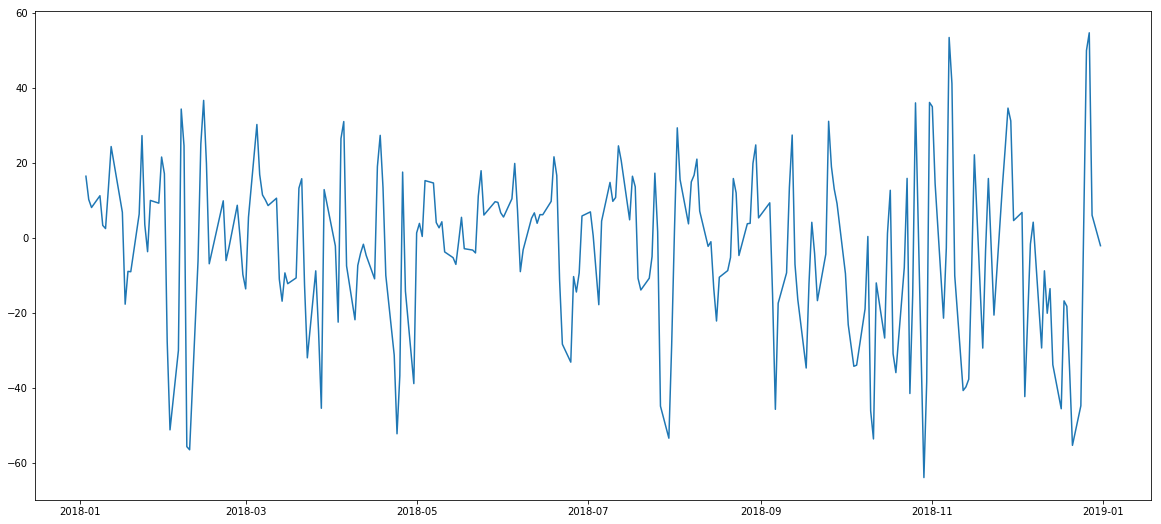

In [42]:
plt.figure(figsize=(20,9))
plt.plot(dt_amzn[dt_amzn.index.year == 2018].Close.sub(dt_amzn[dt_amzn.index.year == 2018].Open).rolling(2).mean())

In [43]:
dt_amzn[dt_amzn.index.year == 2018].Close.sub(dt_amzn[dt_amzn.index.year == 2018].Open).head()

Date
2018-01-02    17.010010
2018-01-03    15.899902
2018-01-04     4.589966
2018-01-05    11.630005
2018-01-08    10.869995
dtype: float64

In [44]:
dt_amzn[dt_amzn.index.year == 2018].Close.sub(dt_amzn[dt_amzn.index.year == 2018].Open).rolling(2).mean().head()

Date
2018-01-02          NaN
2018-01-03    16.454956
2018-01-04    10.244934
2018-01-05     8.109985
2018-01-08    11.250000
dtype: float64

In [45]:
def plot_amzn18_diffs_and_rolling(col1, col2, rollings = [1,2], figsize=(20,9)):
    plt.figure(figsize=figsize)
    plt.title('Difference Between '+col1+' And '+col2)
    amzn18 = dt_amzn[dt_amzn.index.year == 2018]
    diffs = amzn18[col1].sub(amzn18[col2])
    for i in rollings:
        if i == 1:
            plt.plot(diffs, label='Daily')
        else:
            plt.plot(diffs.rolling(i).mean(),label=str(i) + ' Workday Rolling Mean')
    plt.legend()

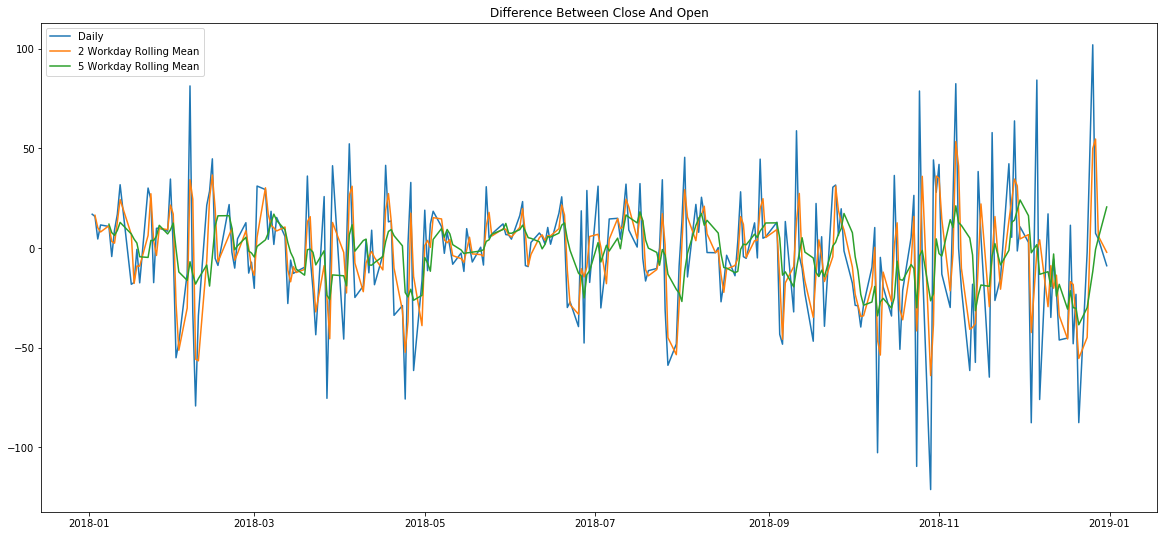

In [46]:
plot_amzn18_diffs_and_rolling('Close','Open',[1,2,5])

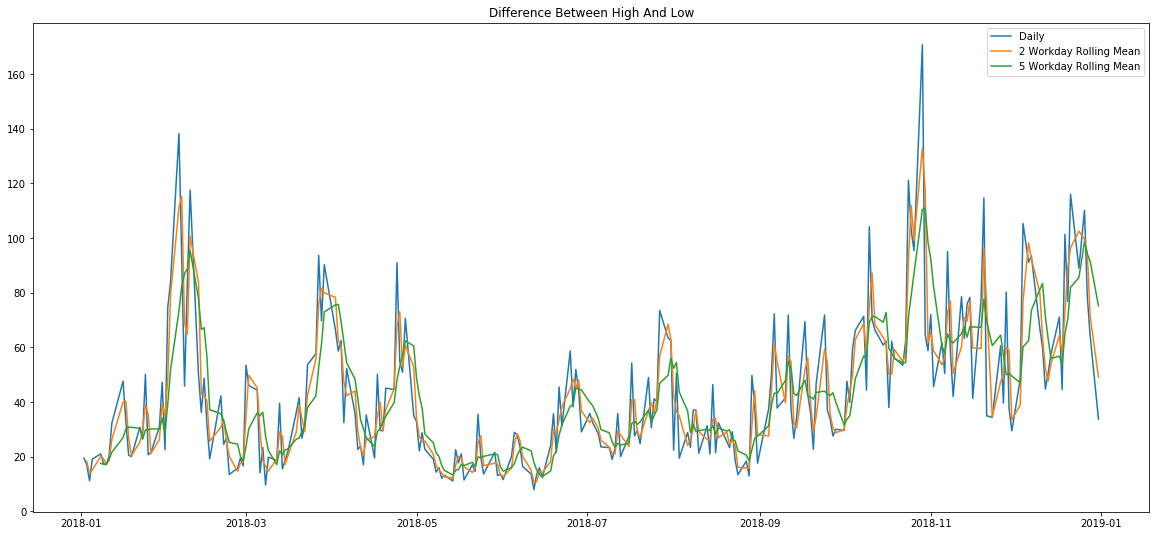

In [47]:
plot_amzn18_diffs_and_rolling('High','Low',[1,2,5])

In [48]:
def plot_amzn18_mar_apr_diffs_and_rolling(col1, col2, rollings = [1,2], figsize=(20,9)):
    plt.figure(figsize=figsize)
    plt.title('Difference Between '+col1+' And '+col2+' For March and April 2018')
    amzn18_mar_apr = dt_amzn[((dt_amzn.index.month == 3) | (dt_amzn.index.month == 4)) & (dt_amzn.index.year == 2018)]
    diffs = amzn18_mar_apr[col1].sub(amzn18_mar_apr[col2])
    for i in rollings:
        if i == 1:
            plt.plot(diffs, label='Daily')
        else:
            plt.plot(diffs.rolling(i).mean(),label=str(i) + ' Workday Rolling Mean')
    plt.legend()

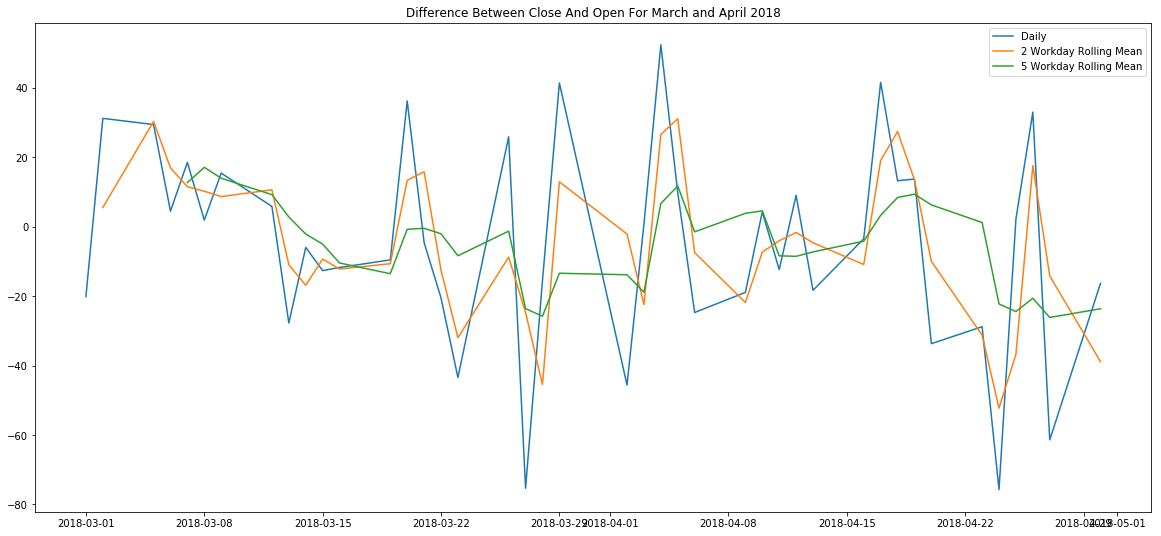

In [49]:
plot_amzn18_mar_apr_diffs_and_rolling('Close','Open',[1,2,5])

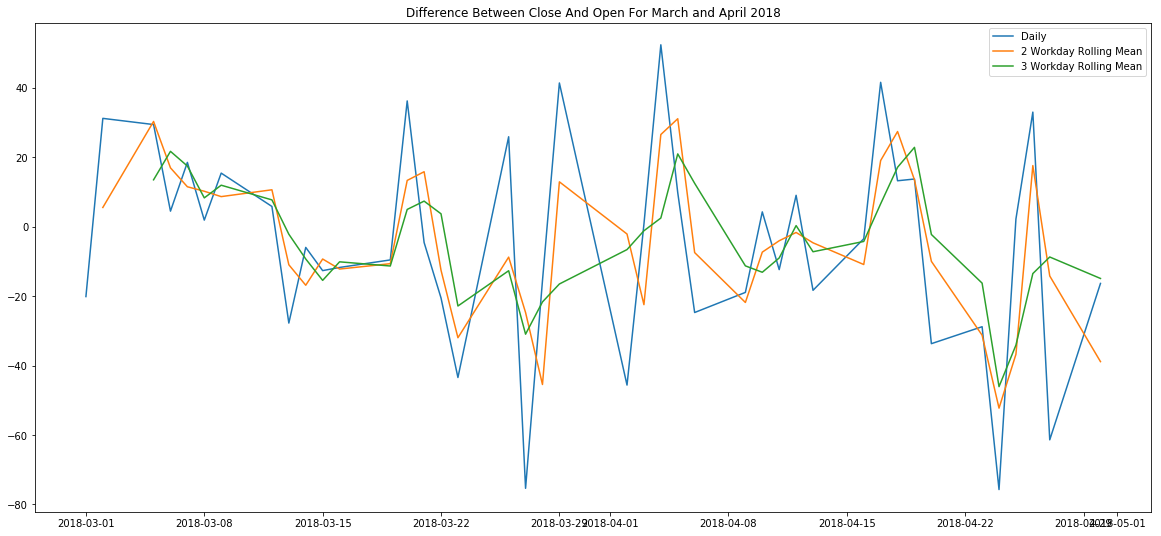

In [50]:
plot_amzn18_mar_apr_diffs_and_rolling('Close','Open',[1,2,3])

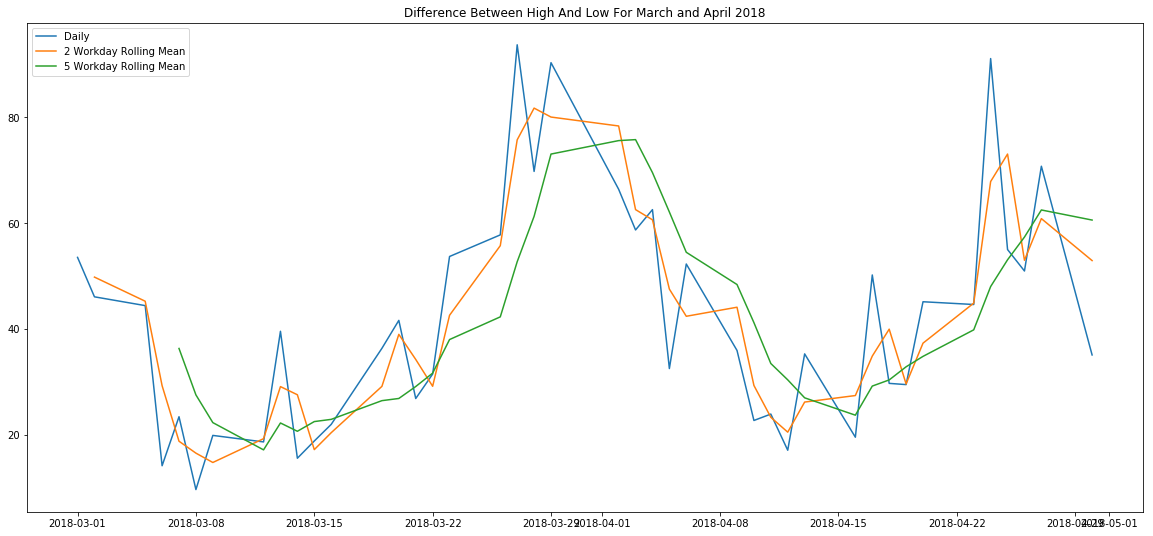

In [51]:
plot_amzn18_mar_apr_diffs_and_rolling('High','Low',[1,2,5])

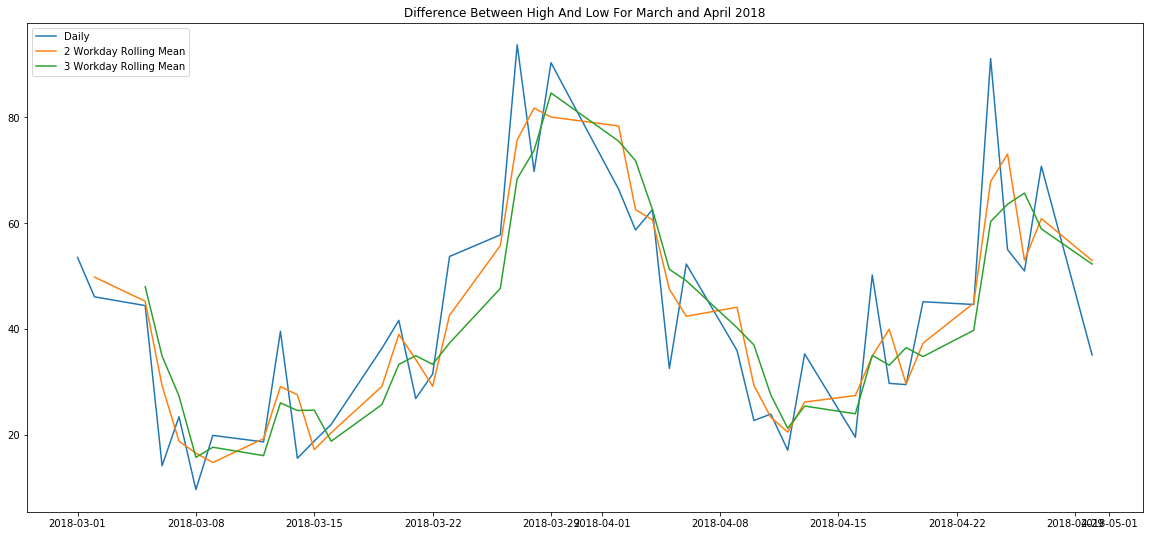

In [52]:
plot_amzn18_mar_apr_diffs_and_rolling('High','Low',[1,2,3])

In [53]:
def plot_amzn18_mar_apr_volume_and_rolling(rollings = [1,2], figsize=(20,9)):
    plt.figure(figsize=figsize)
    plt.title('Volumes For March and April 2018')
    amzn18_mar_apr = dt_amzn[((dt_amzn.index.month == 3) | (dt_amzn.index.month == 4)) & (dt_amzn.index.year == 2018)]
    vols = amzn18_mar_apr['Volume']
    for i in rollings:
        if i == 1:
            plt.plot(vols, label='Daily')
        else:
            plt.plot(vols.rolling(i).mean(),label=str(i) + ' Workday Rolling Mean')
    plt.legend()

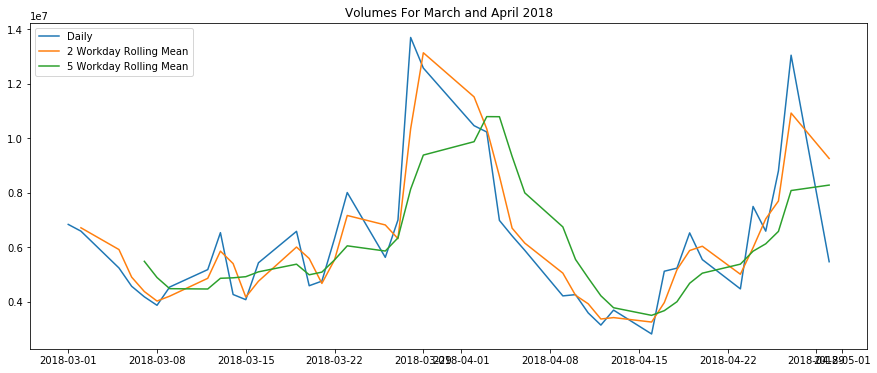

In [54]:
plot_amzn18_mar_apr_volume_and_rolling([1,2,5],figsize=(15,6))

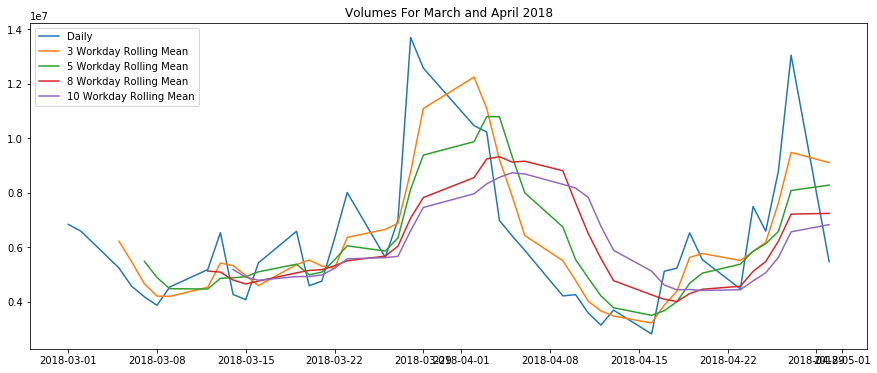

In [55]:
plot_amzn18_mar_apr_volume_and_rolling([1,3,5,8,10],figsize=(15,6))

In [56]:
def plot_amzn18_volume_and_rolling(rollings = [1,2], figsize=(20,9)):
    plt.figure(figsize=figsize)
    plt.title('Volumes for 2018')
    amzn18 = dt_amzn[dt_amzn.index.year == 2018]
    vols = amzn18['Volume']
    for i in rollings:
        if i == 1:
            plt.plot(vols, label='Daily')
        else:
            plt.plot(vols.rolling(i).mean(),label=str(i) + ' Workday Rolling Mean')
    plt.legend()

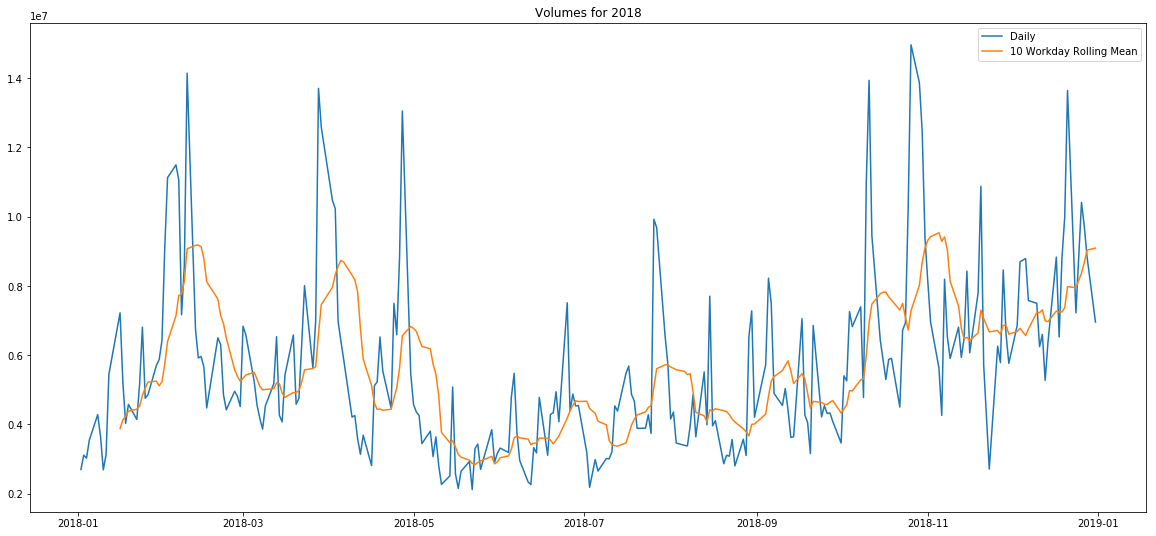

In [57]:
plot_amzn18_volume_and_rolling([1,10],figsize=(20,9))

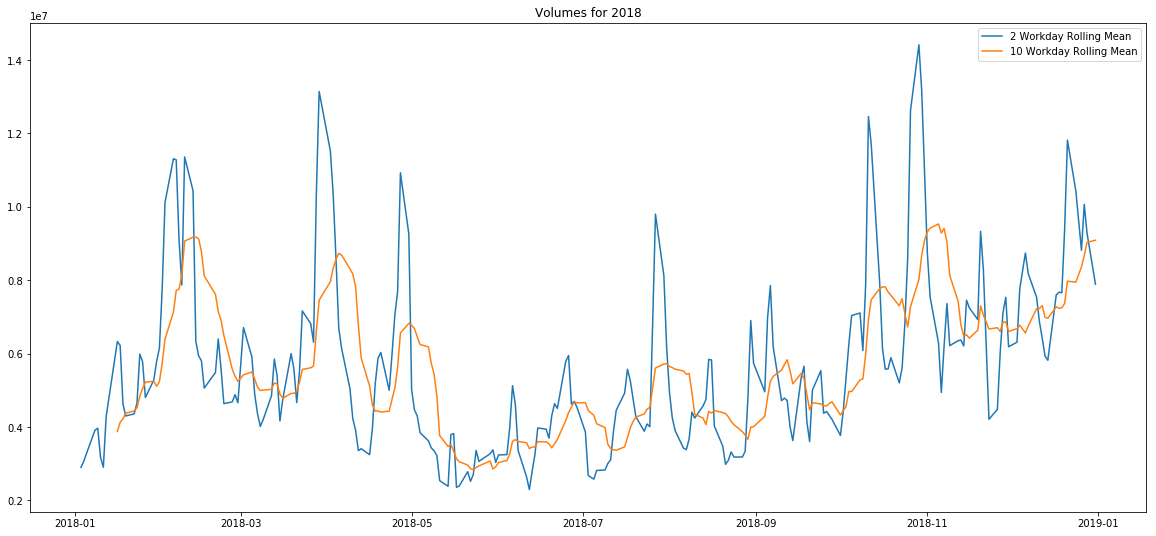

In [58]:
plot_amzn18_volume_and_rolling([2,10],figsize=(20,9))

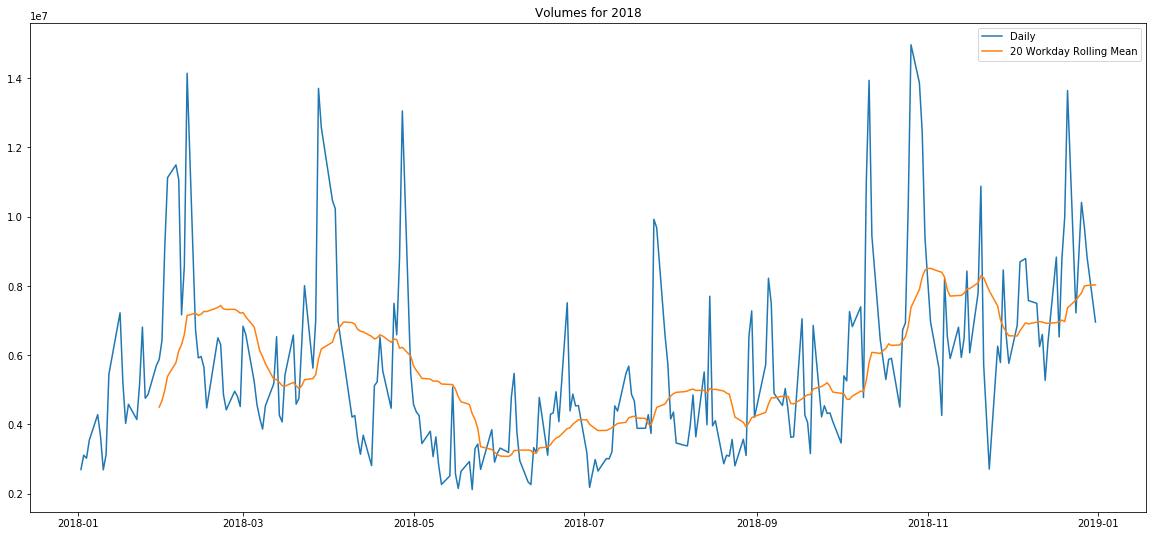

In [59]:
plot_amzn18_volume_and_rolling([1,20],figsize=(20,9))

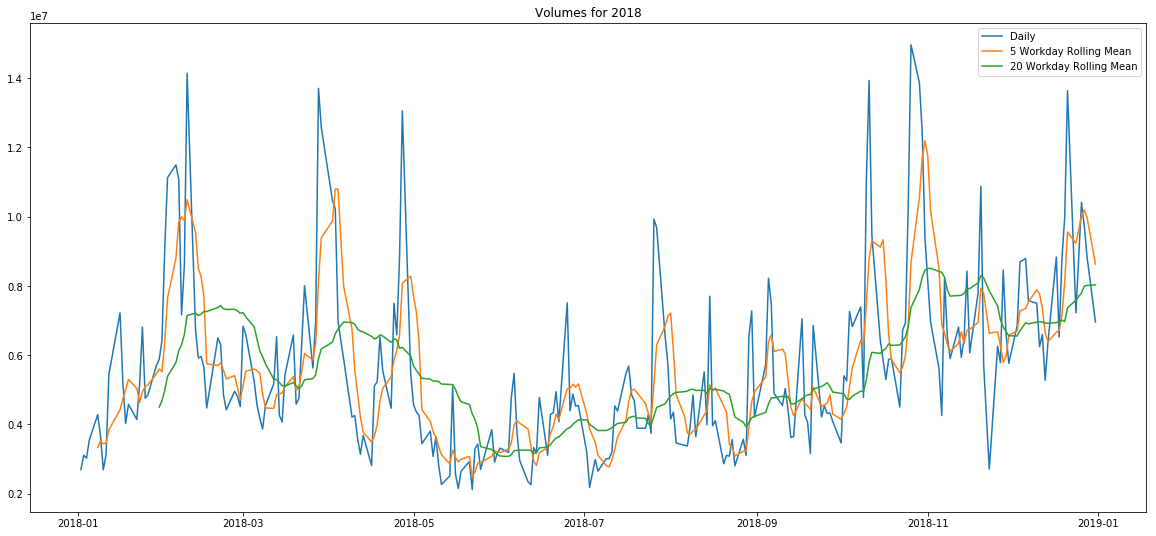

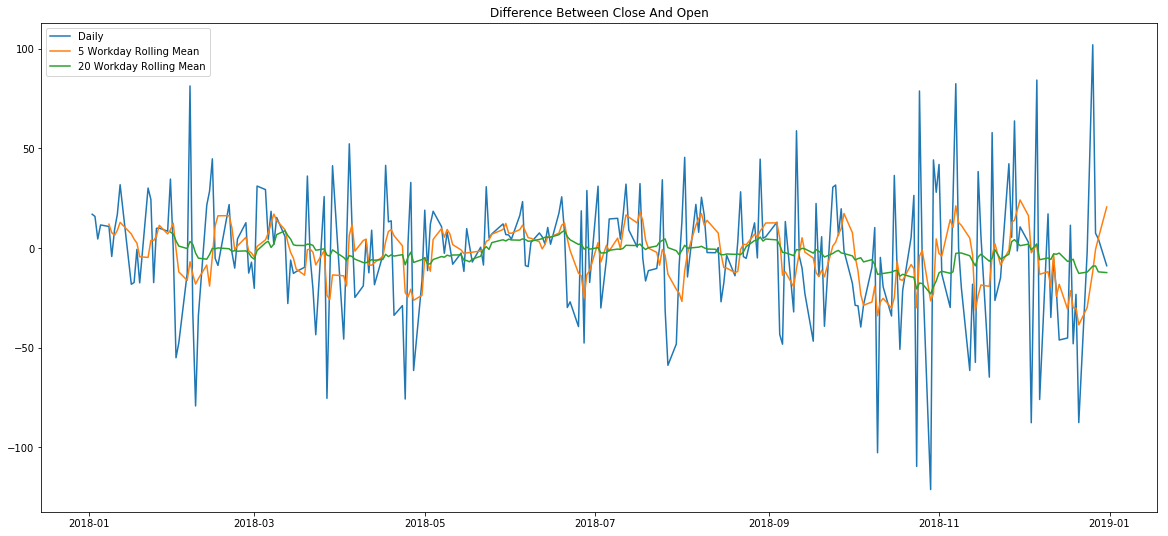

In [60]:
plot_amzn18_volume_and_rolling([1,5,20],figsize=(20,9))
plot_amzn18_diffs_and_rolling('Close','Open',[1,5,20])

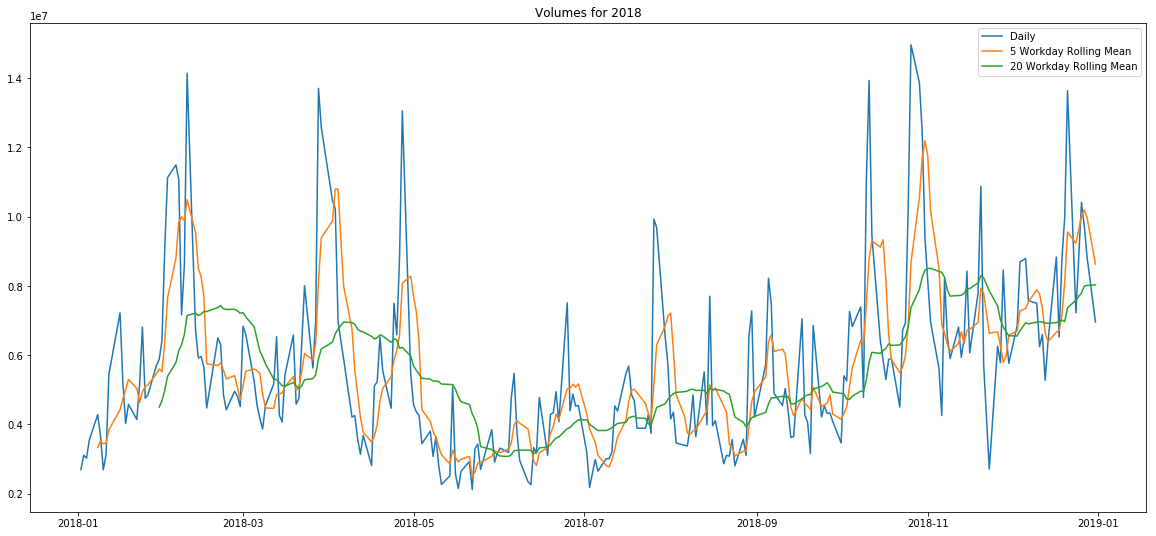

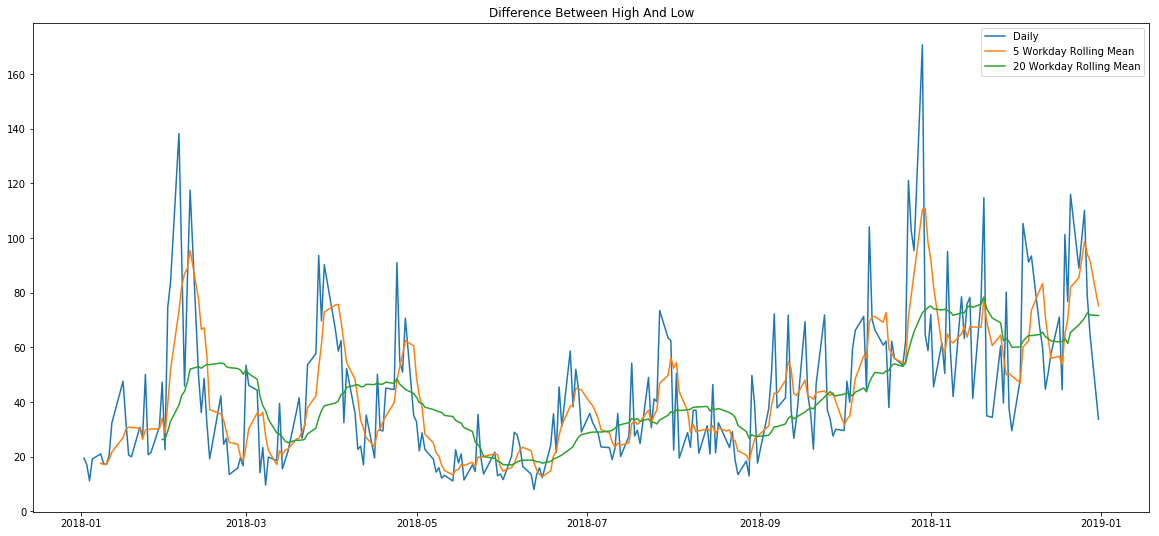

In [61]:
plot_amzn18_volume_and_rolling([1,5,20],figsize=(20,9))
plot_amzn18_diffs_and_rolling('High','Low',[1,5,20])

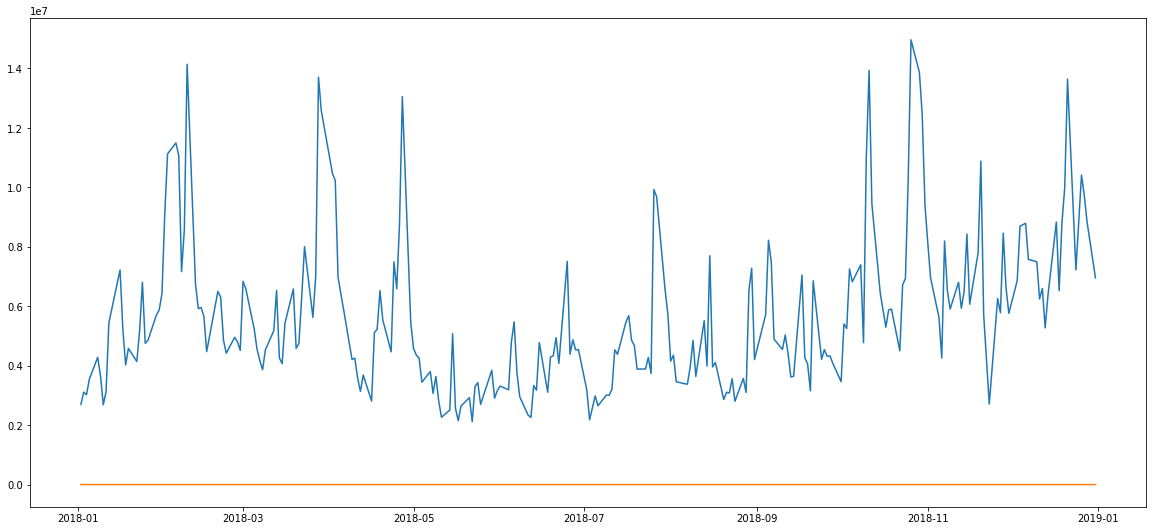

In [62]:
amzn18 = dt_amzn[dt_amzn.index.year == 2018]
plt.figure(figsize=(20,9))
plt.plot(amzn18.Volume)
plt.plot(amzn18['High'].sub(amzn18['Low']))

In [63]:
def plot_amzn18_months_diffs_and_rolling(col1, col2, rollings = [1,2], months = [1,12], figsize=(20,9)):
    plt.figure(figsize=figsize)
    plt.title('Difference Between '+col1+' And '+col2+' For Months ' +str(months[0])+ ' Through ' +str(months[1])+ ' in 2018')
    amzn18_month = dt_amzn[((dt_amzn.index.month >= months[0]) & (dt_amzn.index.month <= months[1])) & (dt_amzn.index.year == 2018)]
    diffs = amzn18_month[col1].sub(amzn18_month[col2])
    for i in rollings:
        if i == 1:
            plt.plot(diffs, label='Daily')
        else:
            plt.plot(diffs.rolling(i).mean(),label=str(i) + ' Workday Rolling Mean')
    plt.legend()

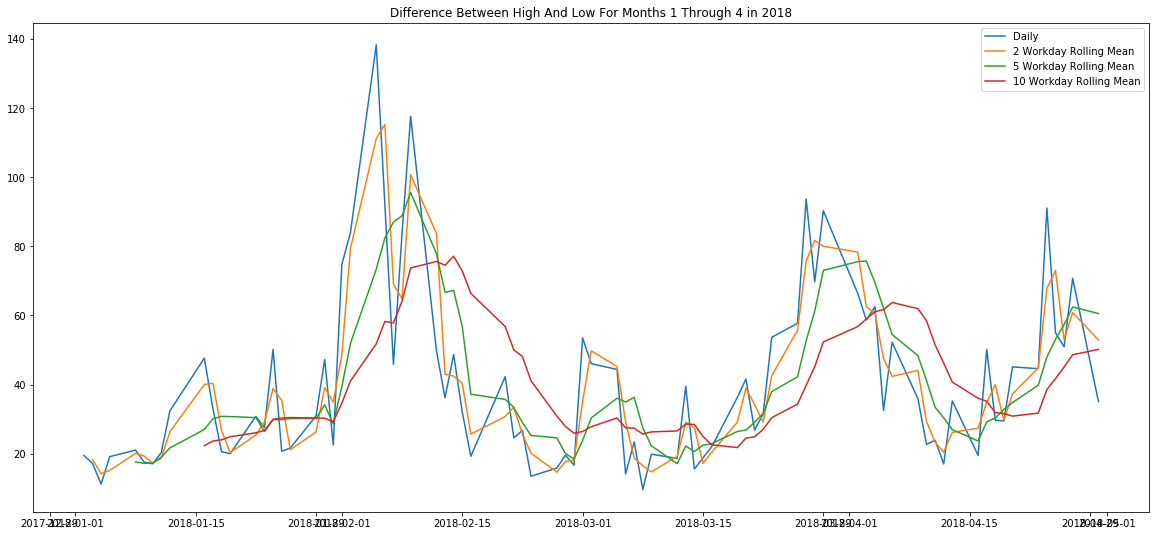

In [64]:
plot_amzn18_months_diffs_and_rolling('High','Low', [1,2,5,10], [1,4])

In [65]:
def plot_amzn18_months_volume_and_rolling(rollings = [1,2], months = [1,12], figsize=(20,9)):
    plt.figure(figsize=figsize)
    plt.title('Volumes For Months ' +str(months[0])+ ' Through ' +str(months[1])+ ' in 2018')
    amzn18_month = dt_amzn[((dt_amzn.index.month >= months[0]) & (dt_amzn.index.month <= months[1])) & (dt_amzn.index.year == 2018)]
    vols = amzn18_month['Volume']
    for i in rollings:
        if i == 1:
            plt.plot(vols, label='Daily')
        else:
            plt.plot(vols.rolling(i).mean(),label=str(i) + ' Workday Rolling Mean')
    plt.legend()

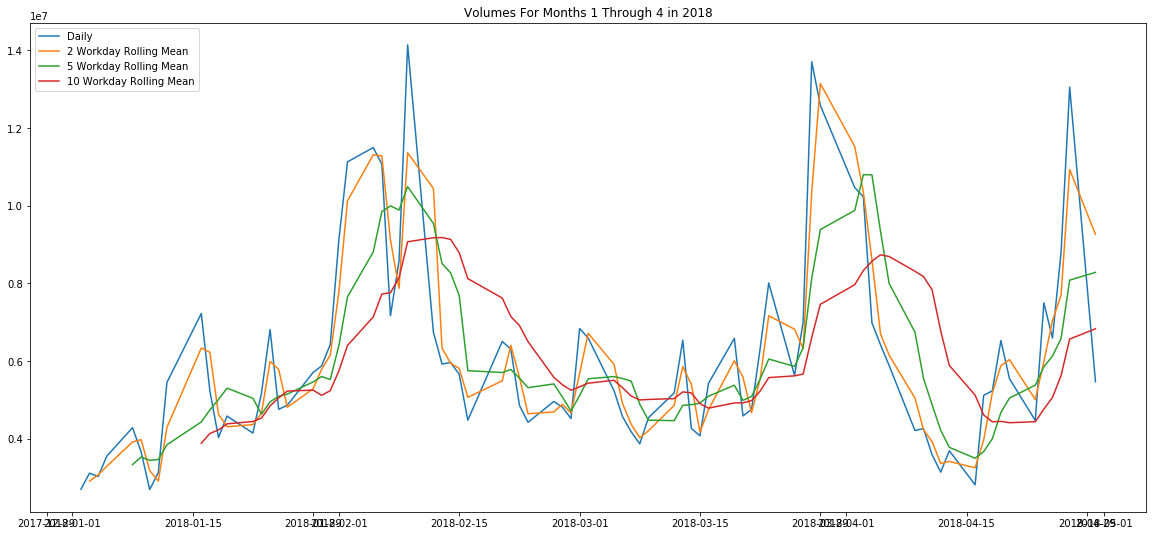

In [66]:
plot_amzn18_months_volume_and_rolling([1,2,5,10], [1,4])

In [67]:
def plot_amzn18_months_volume_and_rolling2(rollings = [1,2], months = [1,12], months2= [], figsize=(20,9)):
    plt.figure(figsize=figsize)
    amzn18_month = dt_amzn[((dt_amzn.index.month >= months[0]) & (dt_amzn.index.month <= months[1])) & (dt_amzn.index.year == 2018)]
    vols = amzn18_month.Volume
    for i in rollings:
        if months2 == []:
            if i == 1:
                plt.plot(vols, label='Daily')
            else:
                plt.plot(vols.rolling(i).mean(),label=str(i) + ' Workday Rolling Mean')
            plt.title('Volumes For Months ' +str(months[0])+ ' Through ' +str(months[1])+ ' in 2018')
        else:
            if i == 1:
                plt.plot(vols[(vols.index.month >= months2[0]) & (vols.index.month <= months2[1])], label='Daily')
            else:
                plt.plot(vols.rolling(i).mean()[(vols.index.month >= months2[0]) & (vols.index.month <= months2[1])],label=str(i) + ' Workday Rolling Mean')
            plt.title('Volumes For Months ' +str(months2[0])+ ' Through ' +str(months2[1])+ ' in 2018')
    plt.legend()

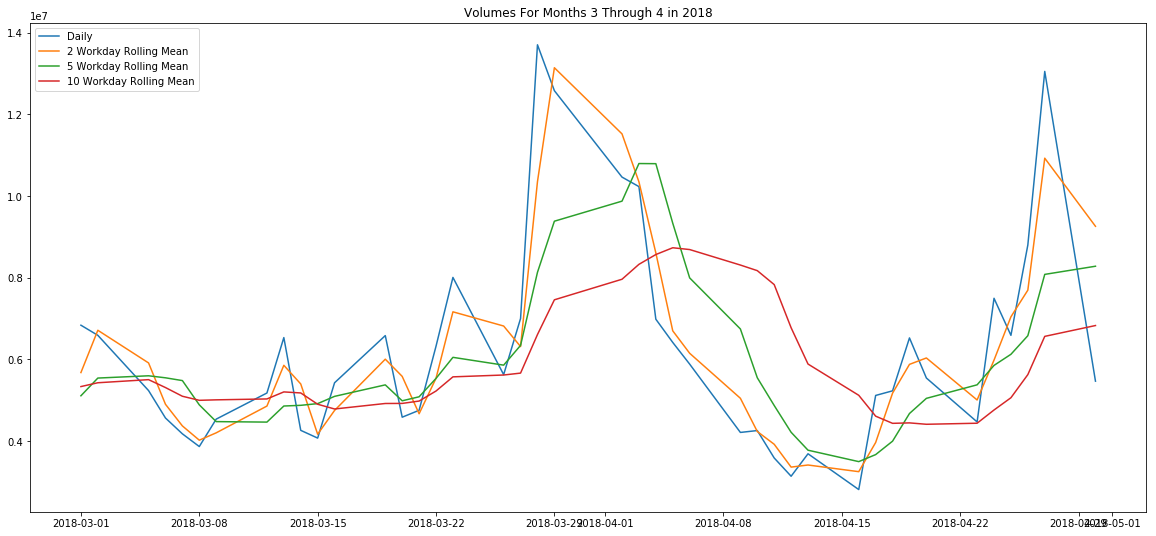

In [68]:
plot_amzn18_months_volume_and_rolling2([1,2,5,10], [1,4], [3,4])

In [69]:
def plot_amzn18_months_diffs_and_rolling2(col1, col2, rollings = [1,2], months = [1,12], months2=[], figsize=(20,9)):
    plt.figure(figsize=figsize)
    amzn18_month = dt_amzn[((dt_amzn.index.month >= months[0]) & (dt_amzn.index.month <= months[1])) & (dt_amzn.index.year == 2018)]
    diffs = amzn18_month[col1].sub(amzn18_month[col2])
    for i in rollings:
        if months2 == []:
            if i == 1:
                plt.plot(diffs, label='Daily')
            else:
                plt.plot(diffs.rolling(i).mean(),label=str(i) + ' Workday Rolling Mean')
            plt.title('Difference Between '+col1+' And '+col2+' For Months ' +str(months[0])+ ' Through ' +str(months[1])+ ' in 2018')
        else:
            if i == 1:
                plt.plot(diffs[(diffs.index.month >= months2[0]) & (diffs.index.month <= months2[1])], label='Daily')
            else:
                plt.plot(diffs.rolling(i).mean()[(diffs.index.month >= months2[0]) & (diffs.index.month <= months2[1])],label=str(i) + ' Workday Rolling Mean')
            plt.title('Difference Between '+col1+' And '+col2+' For Months ' +str(months2[0])+ ' Through ' +str(months2[1])+ ' in 2018')
    plt.legend()

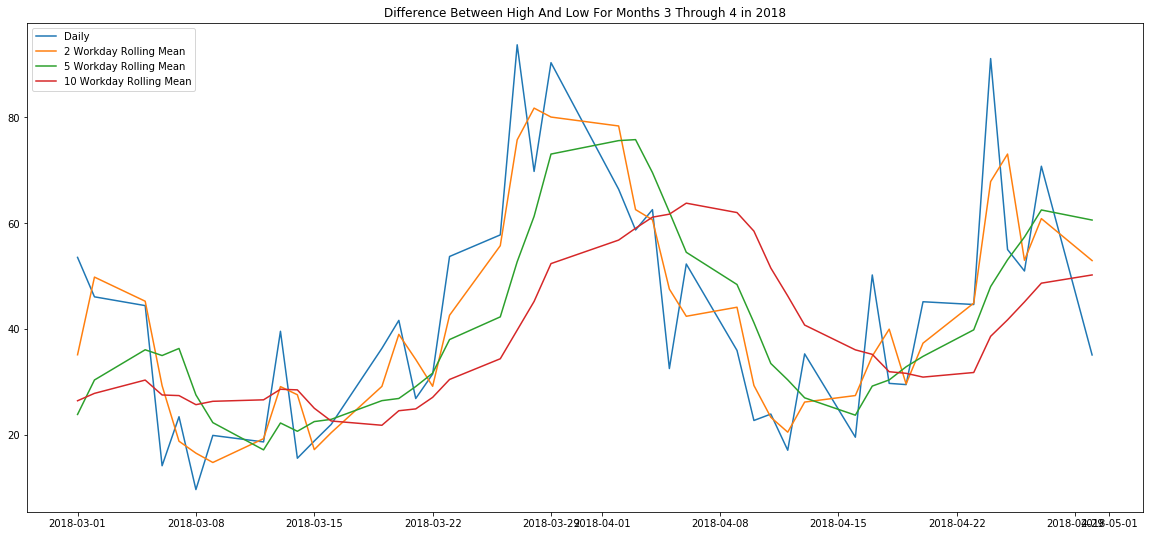

In [70]:
plot_amzn18_months_diffs_and_rolling2('High','Low', [1,2,5,10], [1,4], [3,4])

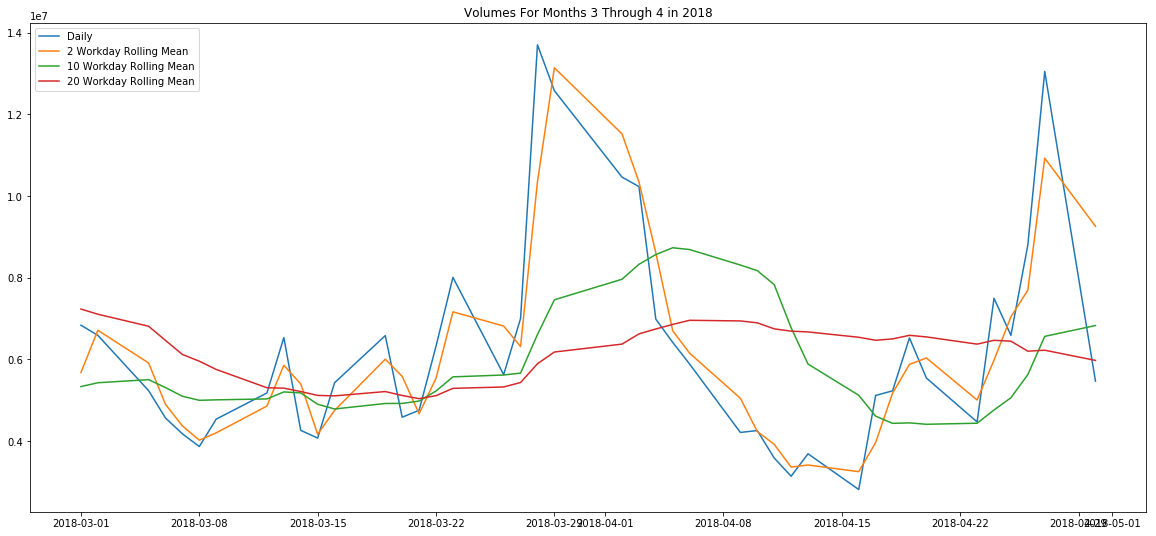

In [71]:
plot_amzn18_months_volume_and_rolling2([1,2,10,20], [1,4], [3,4])

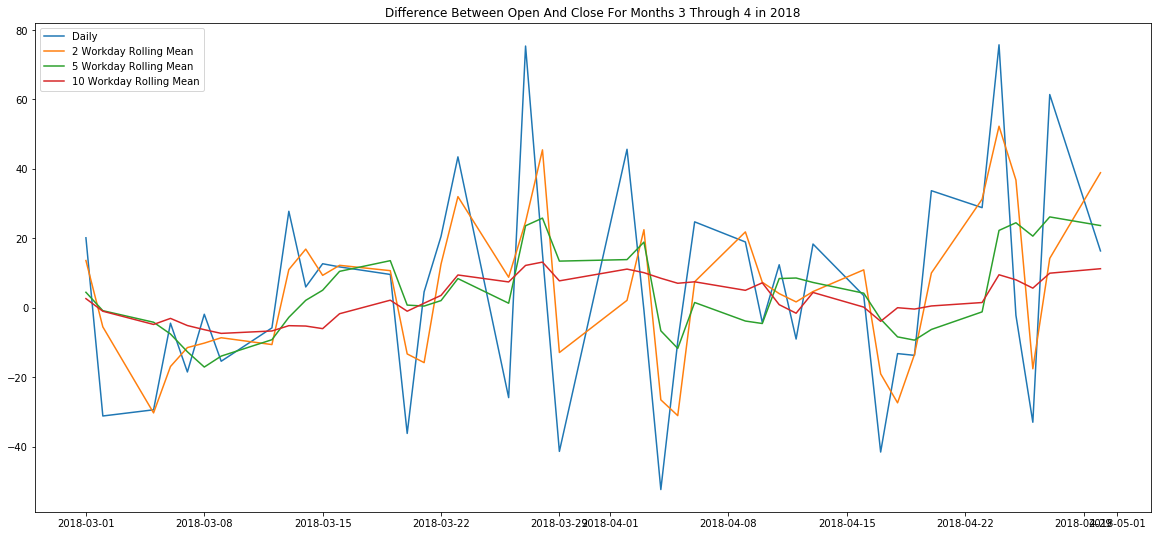

In [72]:
plot_amzn18_months_diffs_and_rolling2('Open','Close', [1,2,5,10], [1,4], [3,4])

In [73]:
def plot_amzn18_months_diffs_and_volume(col1, col2, rollings = [1], months = [1,12], figsize=(20,9)):
    #plt.figure(figsize=figsize)
    #plt.title('Difference and Volumes Between '+col1+' And '+col2+' For Months ' +str(months[0])+ ' Through ' +str(months[1])+ ' in 2018')
    amzn18_month = dt_amzn[((dt_amzn.index.month >= months[0]) & (dt_amzn.index.month <= months[1])) & (dt_amzn.index.year == 2018)]
    diffs = amzn18_month[col1].sub(amzn18_month[col2])
    vols = amzn18_month['Volume']
    fig, ax1 = plt.subplots(figsize=figsize)
    color = ['b', 'r', 'c', 'm', 'g', 'y']
    labels1 = []
    labels2 = []
    for i in rollings:
        ax1.set_xlabel('Date')
       
        ax1.set_ylabel('Daily Differences', color= color[0])
        if i == 1:
            ax1.plot(diffs, color = color[0])
            labels1.append('Daily Differences')
        else:
            k = rollings.index(i)* 2
            if k <= 1:
                style='-'
            else:
                style='--'
            ax1.plot(diffs.rolling(i).mean(), linestyle=style, color = color[k])
            labels1.append(str(i) + ' Workday Rolling Mean for Differences')
        
        if rollings.index(i) == 0:
            y_limits1 = ax1.get_ylim()
        else:
            ax1.set_ylim(y_limits1[0],y_limits1[1])
        
        ax2 = ax1.twinx()
        
        ax2.set_ylabel('Daily Volumes', color=color[1])
        if i == 1:
            ax2.plot(vols,color = color[1])
            labels2.append('Daily Volumes')
        else:
            k = rollings.index(i)*2 + 1
            if k <= 1:
                style='-'
            else:
                style='--'
            ax2.plot(vols.rolling(i).mean(), linestyle=style, color = color[k])
            labels2.append(str(i) + ' Workday Rolling Mean for Volumes')
        
        if rollings.index(i) == 0:
            y_limits2 = ax2.get_ylim()
        else:
            ax2.set_ylim(y_limits2[0],y_limits2[1])
            
    labels = labels1 + labels2
    fig.legend(labels=labels)
    fig.tight_layout()  
    plt.title('Volumes and Differences Between '+col1+' And '+col2+' For Months ' +str(months[0])+ ' Through ' +str(months[1])+ ' in 2018')
    plt.show()

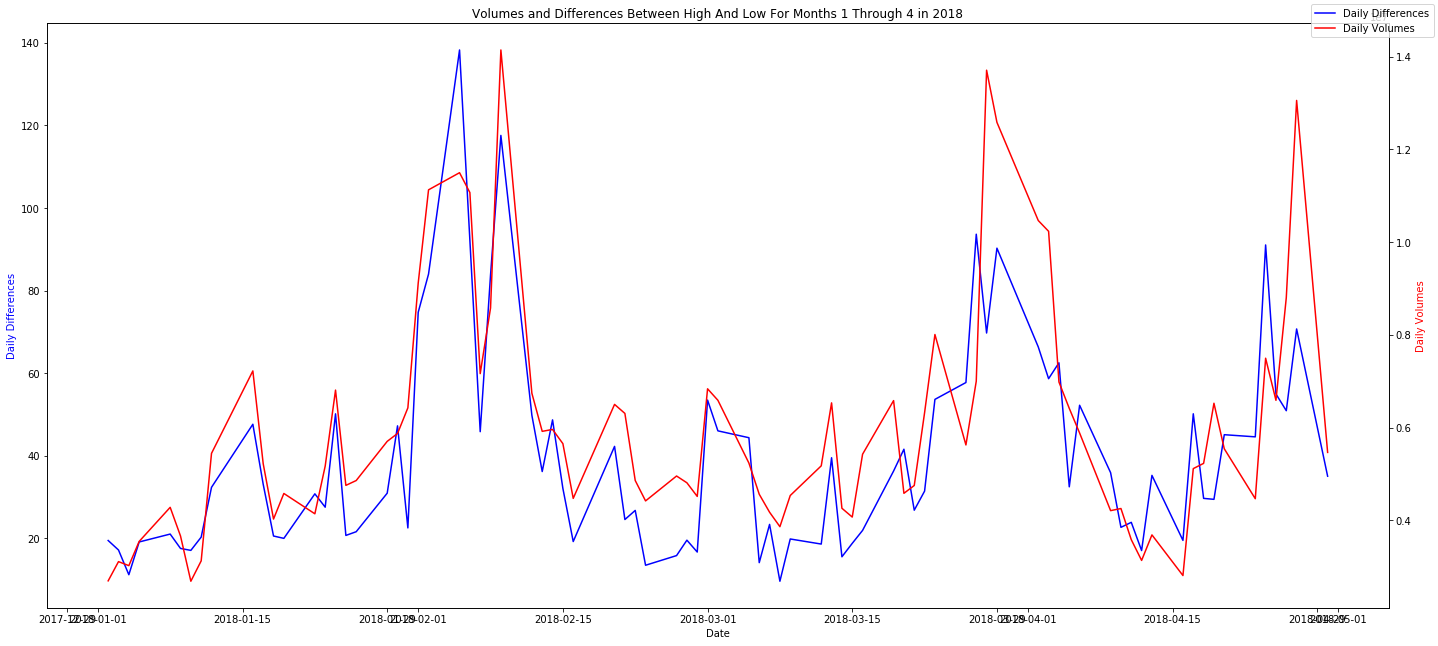

In [74]:
plot_amzn18_months_diffs_and_volume('High','Low', [1], [1,4])

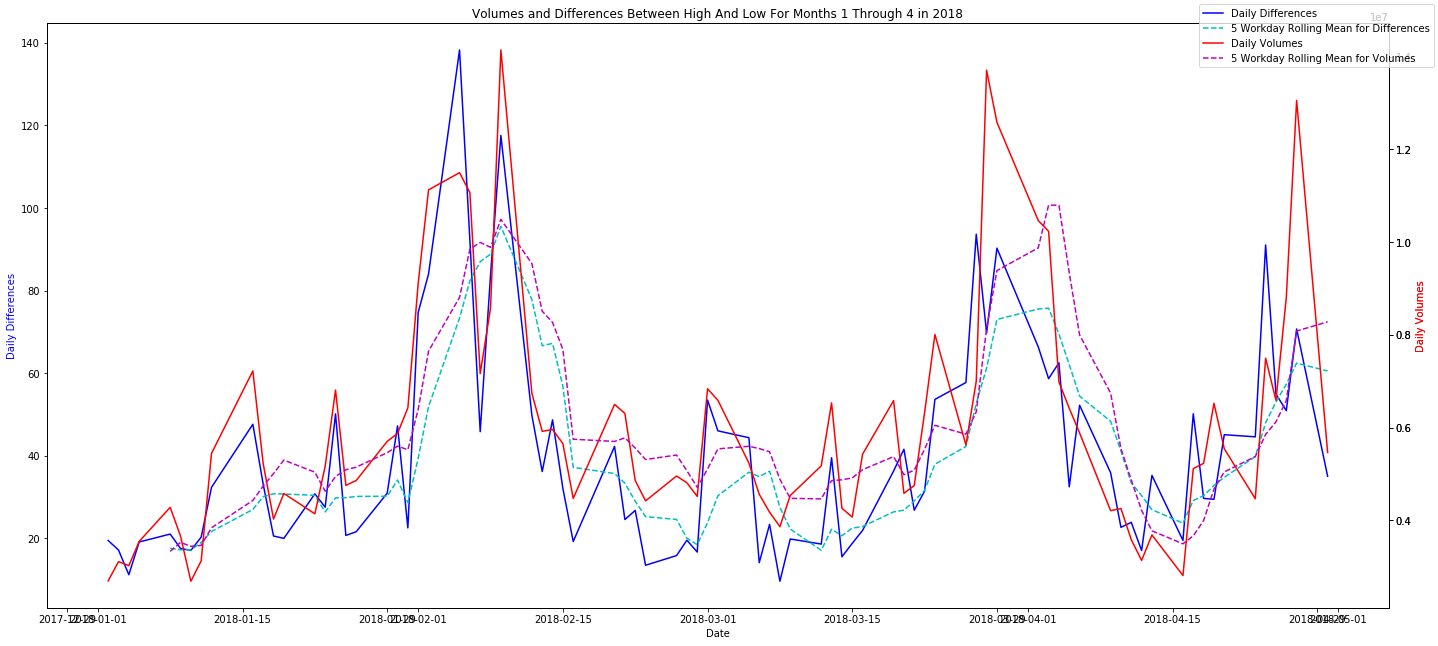

In [75]:
plot_amzn18_months_diffs_and_volume('High','Low', [1,5], [1,4])

In [76]:
['a', 'b'] * 2

['a', 'b', 'a', 'b']

In [77]:
def plot_amzn18_months_diffs_and_volume2(col1, col2, rollings = [1], months = [1,12], months2=[], figsize=(20,9)):
    #plt.figure(figsize=figsize)
    #plt.title('Difference and Volumes Between '+col1+' And '+col2+' For Months ' +str(months[0])+ ' Through ' +str(months[1])+ ' in 2018')
    amzn18_month = dt_amzn[((dt_amzn.index.month >= months[0]) & (dt_amzn.index.month <= months[1])) & (dt_amzn.index.year == 2018)]
    diffs = amzn18_month[col1].sub(amzn18_month[col2])
    vols = amzn18_month['Volume']
    fig, ax1 = plt.subplots(figsize=figsize)
    color = ['b', 'r', 'c', 'm', 'g', 'y']
    labels1 = []
    labels2 = []
    for i in rollings:
        if months2 == []:
            ax1.set_xlabel('Date')

            ax1.set_ylabel('Daily Differences', color= color[0])
            if i == 1:
                ax1.plot(diffs, color = color[0])
                labels1.append('Daily Differences')
            else:
                k = rollings.index(i)* 2
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax1.plot(diffs.rolling(i).mean(), linestyle=style, color = color[k])
                labels1.append(str(i) + ' Workday Rolling Mean for Differences')

            ax2 = ax1.twinx()

            ax2.set_ylabel('Daily Volumes', color=color[1])
            if i == 1:
                ax2.plot(vols,color = color[1])
                labels2.append('Daily Volumes')
            else:
                k = rollings.index(i)*2 + 1
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax2.plot(vols.rolling(i).mean(), linestyle=style, color = color[k])
                labels2.append(str(i) + ' Workday Rolling Mean for Volumes')
                
        else:
            ax1.set_xlabel('Date')

            ax1.set_ylabel('Daily Differences', color= color[0])
            if i == 1:
                ax1.plot(diffs[(diffs.index.month >= months2[0]) & (diffs.index.month <= months2[1])], color = color[0])
                labels1.append('Daily Differences')
            else:
                k = rollings.index(i)* 2
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax1.plot(diffs.rolling(i).mean()[(diffs.index.month >= months2[0]) & (diffs.index.month <= months2[1])], linestyle=style, color = color[k])
                labels1.append(str(i) + ' Workday Rolling Mean for Differences')
            
            if rollings.index(i) == 0:
                y_limits1 = ax1.get_ylim()
            else:
                ax1.set_ylim(y_limits1[0],y_limits1[1])
                
            ax2 = ax1.twinx()

            ax2.set_ylabel('Daily Volumes', color=color[1])
            if i == 1:
                ax2.plot(vols[(vols.index.month >= months2[0]) & (vols.index.month <= months2[1])],color = color[1])
                labels2.append('Daily Volumes')
            else:
                k = rollings.index(i)*2 + 1
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax2.plot(vols.rolling(i).mean()[(vols.index.month >= months2[0]) & (vols.index.month <= months2[1])], linestyle=style, color = color[k])
                labels2.append(str(i) + ' Workday Rolling Mean for Volumes')
            
            if rollings.index(i) == 0:
                y_limits2 = ax2.get_ylim()
            else:
                ax2.set_ylim(y_limits2[0],y_limits2[1])
            
    labels = labels1 + labels2
    fig.legend(labels=labels)
    fig.tight_layout()  
    if months2 == []:
        plt.title('Volumes and Differences Between '+col1+' And '+col2+' For Months ' +str(months[0])+ ' Through ' +str(months[1])+ ' in 2018')
    else:
        plt.title('Volumes and Differences Between '+col1+' And '+col2+' For Months ' +str(months2[0])+ ' Through ' +str(months2[1])+ ' in 2018')
    plt.show()

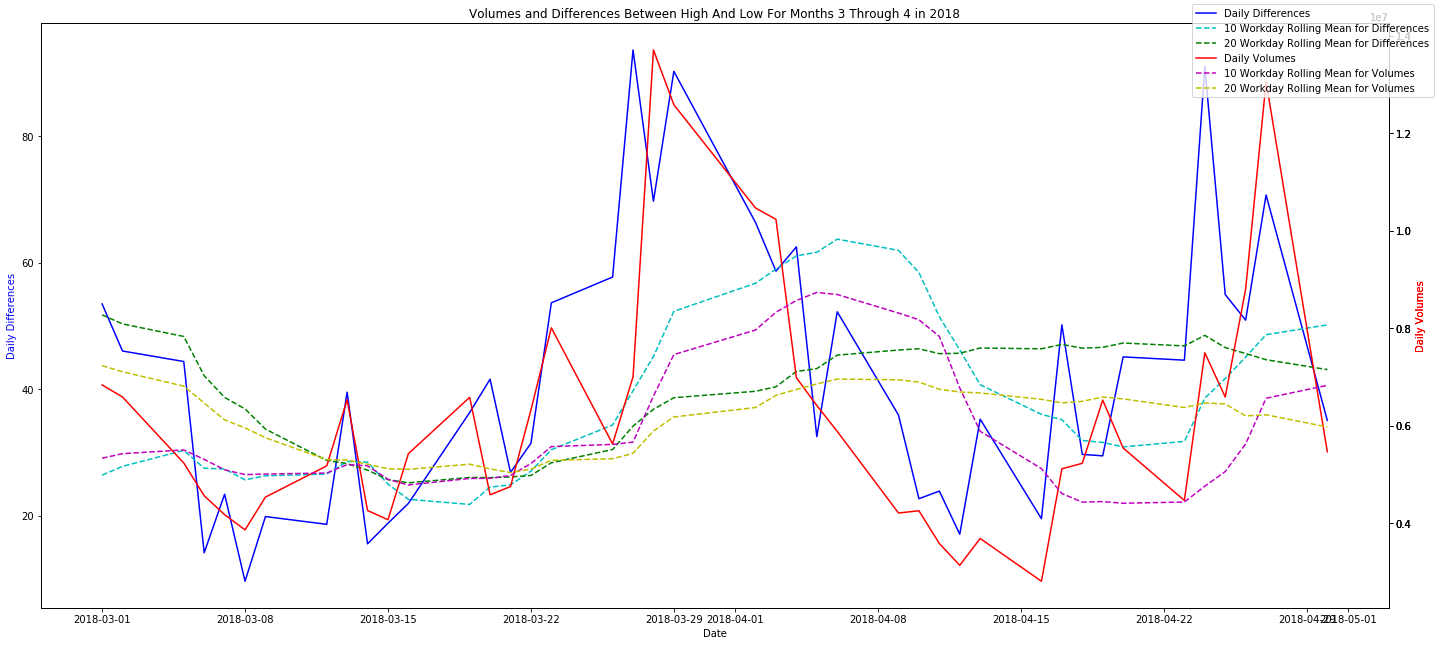

In [83]:
plot_amzn18_months_diffs_and_volume2('High','Low', [1,10,20], [1,4], [3,4])

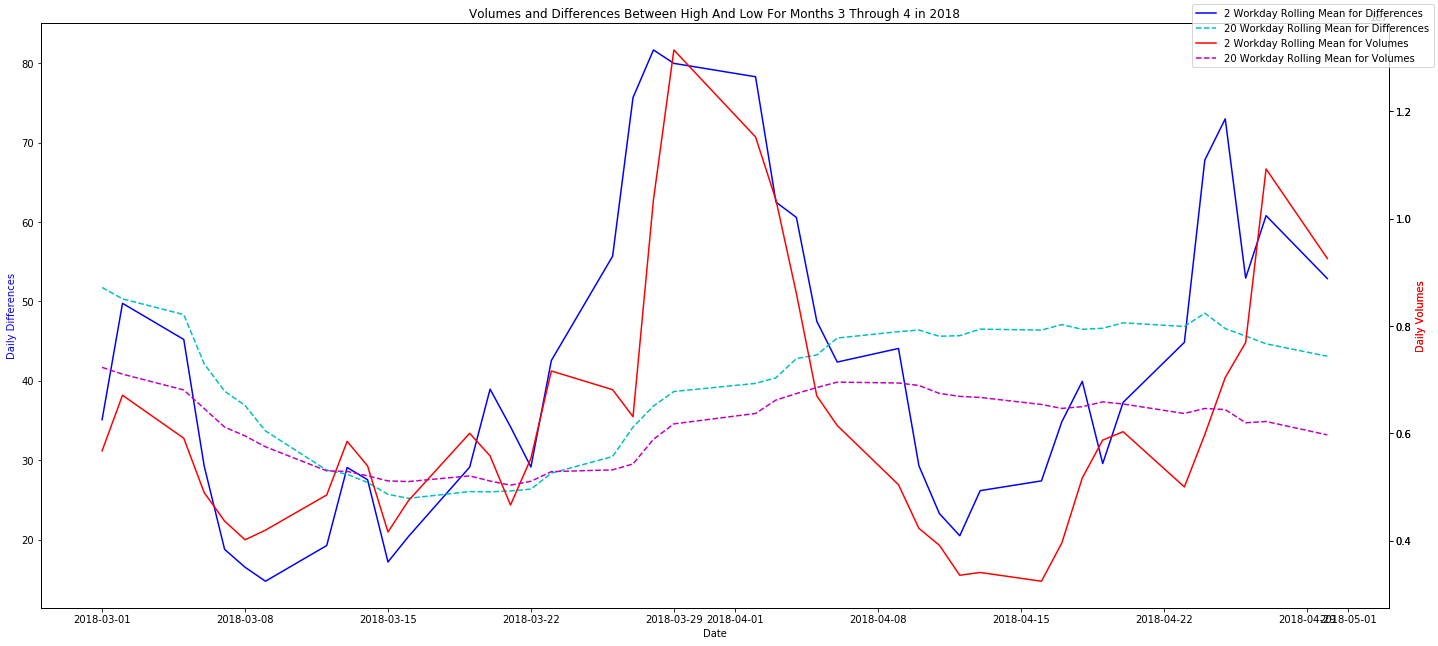

In [87]:
plot_amzn18_months_diffs_and_volume2('High','Low', [2,20], [1,4], [3,4])

In [125]:
def plot_amzn18_months_diffs_and_volume3(col1, col2, rollings = [1], months = [1,12], months2=[], sd=False, figsize=(20,9)):
    #plt.figure(figsize=figsize)
    #plt.title('Difference and Volumes Between '+col1+' And '+col2+' For Months ' +str(months[0])+ ' Through ' +str(months[1])+ ' in 2018')
    amzn18_month = dt_amzn[((dt_amzn.index.month >= months[0]) & (dt_amzn.index.month <= months[1])) & (dt_amzn.index.year == 2018)]
    diffs = amzn18_month[col1].sub(amzn18_month[col2])
    vols = amzn18_month['Volume']
    fig, ax1 = plt.subplots(figsize=figsize)
    color = ['b', 'r', 'c', 'm', 'g', 'y']
    labels1 = []
    labels2 = []
    for i in rollings:
        if months2 == []:
            ax1.set_xlabel('Date')

            ax1.set_ylabel('Daily Differences', color= color[0])
            if i == 1:
                ax1.plot(diffs, color = color[0])
                labels1.append('Daily Differences')
            else:
                k = rollings.index(i)* 2
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax1.plot(diffs.rolling(i).mean(), linestyle=style, color = color[k])
                labels1.append(str(i) + ' Workday Rolling Mean for Differences')

            ax2 = ax1.twinx()

            ax2.set_ylabel('Daily Volumes', color=color[1])
            if i == 1:
                ax2.plot(vols,color = color[1])
                labels2.append('Daily Volumes')
            else:
                k = rollings.index(i)*2 + 1
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax2.plot(vols.rolling(i).mean(), linestyle=style, color = color[k])
                labels2.append(str(i) + ' Workday Rolling Mean for Volumes')
                
        else:
            ax1.set_xlabel('Date')

            ax1.set_ylabel('Daily Differences', color= color[0])
            if i == 1:
                ax1.plot(diffs[(diffs.index.month >= months2[0]) & (diffs.index.month <= months2[1])], color = color[0])
                labels1.append('Daily Differences')
            else:
                k = rollings.index(i)* 2
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax1.plot(diffs.rolling(i).mean()[(diffs.index.month >= months2[0]) & (diffs.index.month <= months2[1])], linestyle=style, color = color[k])
                labels1.append(str(i) + ' Workday Rolling Mean for Differences')
            
            if rollings.index(i) == 0:
                y_limits1 = ax1.get_ylim()
            else:
                ax1.set_ylim(y_limits1[0],y_limits1[1])
                
            ax2 = ax1.twinx()

            ax2.set_ylabel('Daily Volumes', color=color[1])
            if i == 1:
                ax2.plot(vols[(vols.index.month >= months2[0]) & (vols.index.month <= months2[1])],color = color[1])
                labels2.append('Daily Volumes')
            else:
                k = rollings.index(i)*2 + 1
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax2.plot(vols.rolling(i).mean()[(vols.index.month >= months2[0]) & (vols.index.month <= months2[1])], linestyle=style, color = color[k])
                labels2.append(str(i) + ' Workday Rolling Mean for Volumes')
            
            if rollings.index(i) == 0:
                y_limits2 = ax2.get_ylim()
            else:
                ax2.set_ylim(y_limits2[0],y_limits2[1])
     
    #for including rolling sd
    if sd == True:
        if i > 1:
            print(i)
            if months2 == []:
                ax1.plot(diffs.rolling(i).std(), linestyle=':', color = color[4])
                labels1.append(str(i) + ' Workday Rolling SD for Differences')
                ax2 = ax1.twinx()
                ax2.plot(vols.rolling(i).std(), linestyle=':', color = color[5])
                labels2.append(str(i) + ' Workday Rolling SD for Volumes')
            else:
                ax1.plot(diffs.rolling(i).std()[(diffs.index.month >= months2[0]) & (diffs.index.month <= months2[1])], linestyle=':', color = color[4])
                labels1.append(str(i) + ' Workday Rolling SD for Differences')
                ax2 = ax1.twinx()
                ax2.plot(vols.rolling(i).std()[(vols.index.month >= months2[0]) & (vols.index.month <= months2[1])], linestyle=':', color = color[5])
                labels2.append(str(i) + ' Workday Rolling SD for Volumes')          
            ax1.set_ylim(y_limits1[0],y_limits1[1])
            ax2.set_ylim(y_limits2[0],y_limits2[1])
        
    labels = labels1 + labels2
    fig.legend(labels=labels)
    fig.tight_layout()  
    if months2 == []:
        plt.title('Volumes and Differences Between '+col1+' And '+col2+' For Months ' +str(months[0])+ ' Through ' +str(months[1])+ ' in 2018')
    else:
        plt.title('Volumes and Differences Between '+col1+' And '+col2+' For Months ' +str(months2[0])+ ' Through ' +str(months2[1])+ ' in 2018')
    plt.show()

20


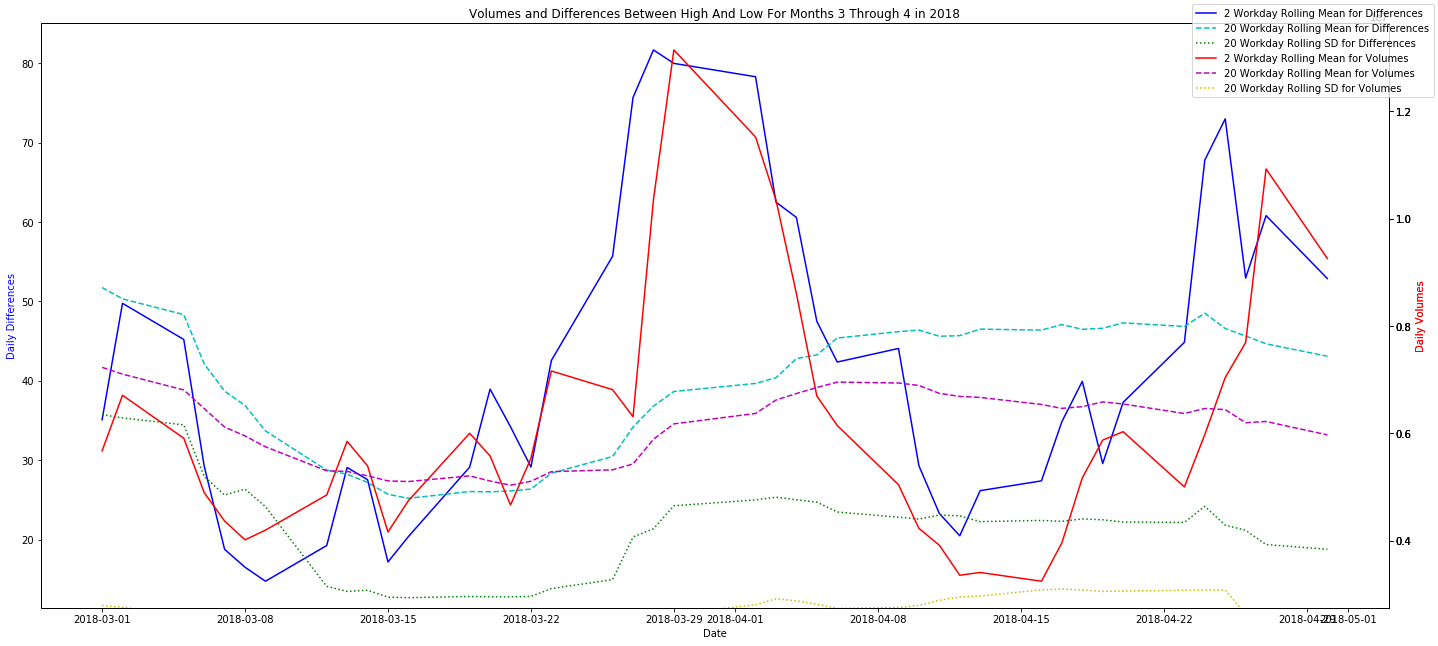

In [126]:
plot_amzn18_months_diffs_and_volume3('High','Low', [2,20], [1,4], [3,4], sd=True)

30


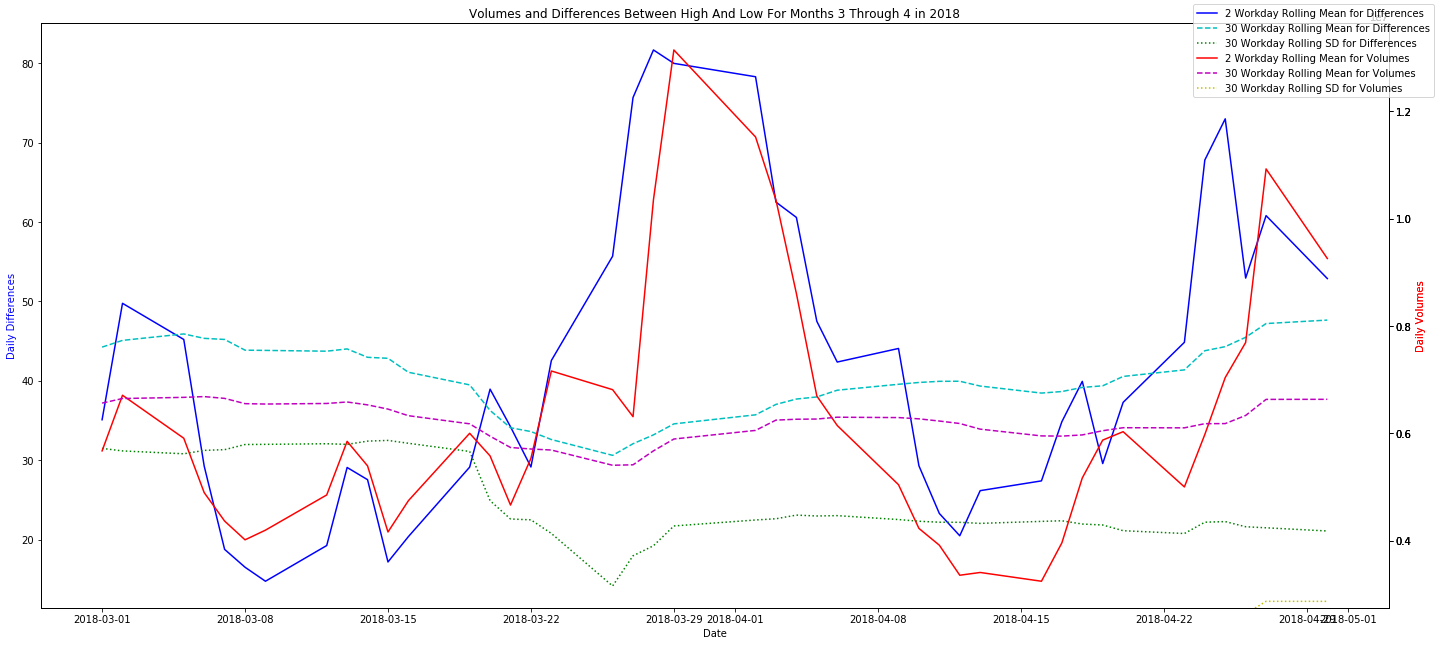

In [97]:
plot_amzn18_months_diffs_and_volume3('High','Low', [2,30], [1,4], [3,4], sd=True)

In [124]:
def plot_amzn18_months_diffs_and_volume4(col1, col2, rollings = [1], months = [1,12], months2=[], sd=False, figsize=(20,9)):
    #plt.figure(figsize=figsize)
    #plt.title('Difference and Volumes Between '+col1+' And '+col2+' For Months ' +str(months[0])+ ' Through ' +str(months[1])+ ' in 2018')
    amzn18_month = dt_amzn[((dt_amzn.index.month >= months[0]) & (dt_amzn.index.month <= months[1])) & (dt_amzn.index.year == 2018)]
    diffs = amzn18_month[col1].sub(amzn18_month[col2])
    vols = amzn18_month['Volume']
    fig, ax1 = plt.subplots(figsize=figsize)
    color = ['b', 'r', 'c', 'm', 'g', 'y']
    labels1 = []
    labels2 = []
    for i in rollings:
        if months2 == []:
            ax1.set_xlabel('Date')

            ax1.set_ylabel('Daily Differences', color= color[0])
            if i == 1:
                ax1.plot(diffs, color = color[0])
                labels1.append('Daily Differences')
            else:
                k = rollings.index(i)* 2
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax1.plot(diffs.rolling(i).mean(), linestyle=style, color = color[k])
                labels1.append(str(i) + ' Workday Rolling Mean for Differences')

            ax2 = ax1.twinx()

            ax2.set_ylabel('Daily Volumes', color=color[1])
            if i == 1:
                ax2.plot(vols,color = color[1])
                labels2.append('Daily Volumes')
            else:
                k = rollings.index(i)*2 + 1
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax2.plot(vols.rolling(i).mean(), linestyle=style, color = color[k])
                labels2.append(str(i) + ' Workday Rolling Mean for Volumes')
                
        else:
            ax1.set_xlabel('Date')

            ax1.set_ylabel('Daily Differences', color= color[0])
            if i == 1:
                ax1.plot(diffs[(diffs.index.month >= months2[0]) & (diffs.index.month <= months2[1])], color = color[0])
                labels1.append('Daily Differences')
            else:
                k = rollings.index(i)* 2
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax1.plot(diffs.rolling(i).mean()[(diffs.index.month >= months2[0]) & (diffs.index.month <= months2[1])], linestyle=style, color = color[k])
                labels1.append(str(i) + ' Workday Rolling Mean for Differences')
                
            ax2 = ax1.twinx()

            ax2.set_ylabel('Daily Volumes', color=color[1])
            if i == 1:
                ax2.plot(vols[(vols.index.month >= months2[0]) & (vols.index.month <= months2[1])],color = color[1])
                labels2.append('Daily Volumes')
            else:
                k = rollings.index(i)*2 + 1
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax2.plot(vols.rolling(i).mean()[(vols.index.month >= months2[0]) & (vols.index.month <= months2[1])], linestyle=style, color = color[k])
                labels2.append(str(i) + ' Workday Rolling Mean for Volumes')
           
        if rollings.index(i) == 0:
            y_limits1 = ax1.get_ylim()
            y_limits2 = ax2.get_ylim()
        else:
            ax1.set_ylim(y_limits1[0],y_limits1[1])
            ax2.set_ylim(y_limits2[0],y_limits2[1])
     
    #for including rolling sd + rolling mean
    if sd == True:
        if i > 1:
            print(i)
            if months2 == []:
                ax1.plot(diffs.rolling(i).mean() + diffs.rolling(i).std(), linestyle=':', color = color[4])
                labels1.append(str(i) + ' Workday Rolling SD for Differences')
                ax2 = ax1.twinx()
                ax2.plot(vols.rolling(i).mean() + vols.rolling(i).std(), linestyle=':', color = color[5])
                labels2.append(str(i) + ' Workday Rolling SD for Volumes')
            else:
                ax1.plot(diffs.rolling(i).mean()[(diffs.index.month >= months2[0]) & (diffs.index.month <= months2[1])] + diffs.rolling(i).std()[(diffs.index.month >= months2[0]) & (diffs.index.month <= months2[1])], linestyle=':', color = color[4])
                labels1.append(str(i) + ' Workday Rolling Mean + SD for Differences')
                ax2 = ax1.twinx()
                ax2.plot(vols.rolling(i).mean()[(vols.index.month >= months2[0]) & (vols.index.month <= months2[1])] + vols.rolling(i).std()[(vols.index.month >= months2[0]) & (vols.index.month <= months2[1])], linestyle=':', color = color[5])
                labels2.append(str(i) + ' Workday Rolling Mean + SD for Volumes')          
            ax1.set_ylim(y_limits1[0],y_limits1[1])
            ax2.set_ylim(y_limits2[0],y_limits2[1])
    
    labels = labels1 + labels2
    fig.legend(labels=labels)
    fig.tight_layout()  
    if months2 == []:
        plt.title('Volumes and Differences Between '+col1+' And '+col2+' For Months ' +str(months[0])+ ' Through ' +str(months[1])+ ' in 2018')
    else:
        plt.title('Volumes and Differences Between '+col1+' And '+col2+' For Months ' +str(months2[0])+ ' Through ' +str(months2[1])+ ' in 2018')
    plt.show()

20


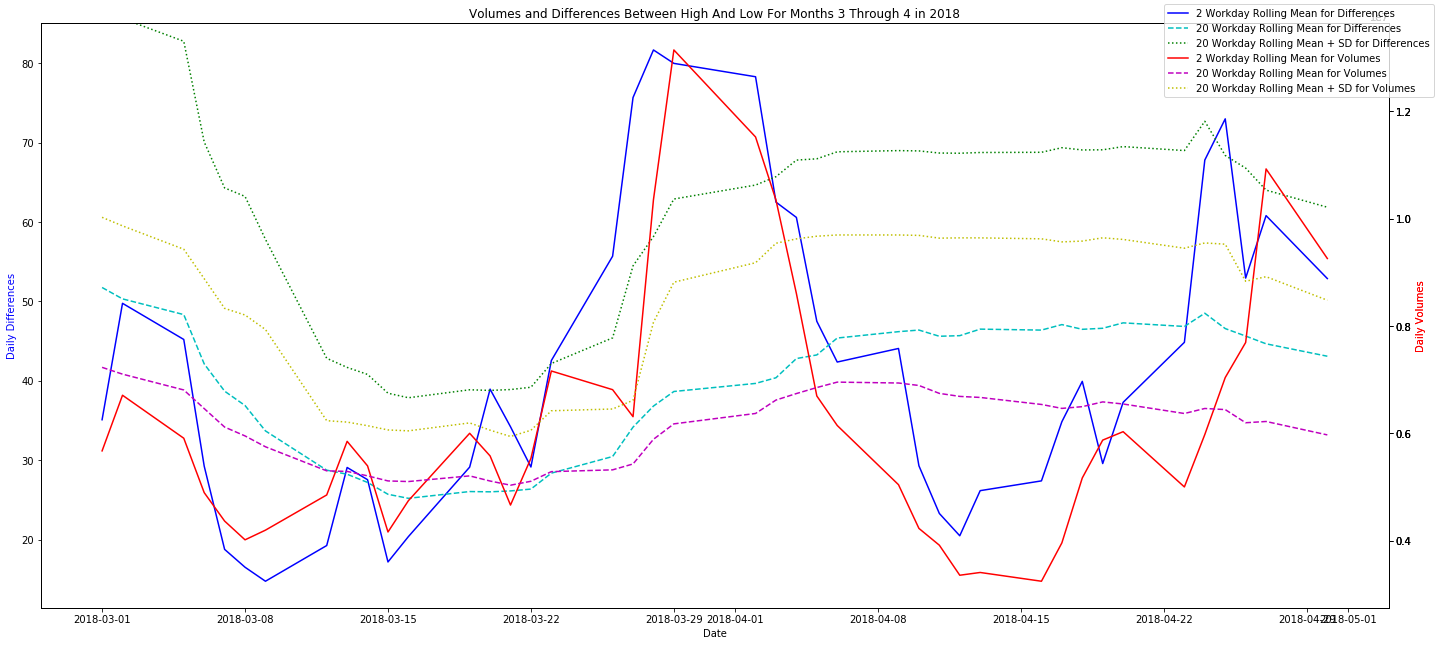

In [116]:
plot_amzn18_months_diffs_and_volume4('High','Low', [2,20], [1,4], [3,4], sd=True)

30


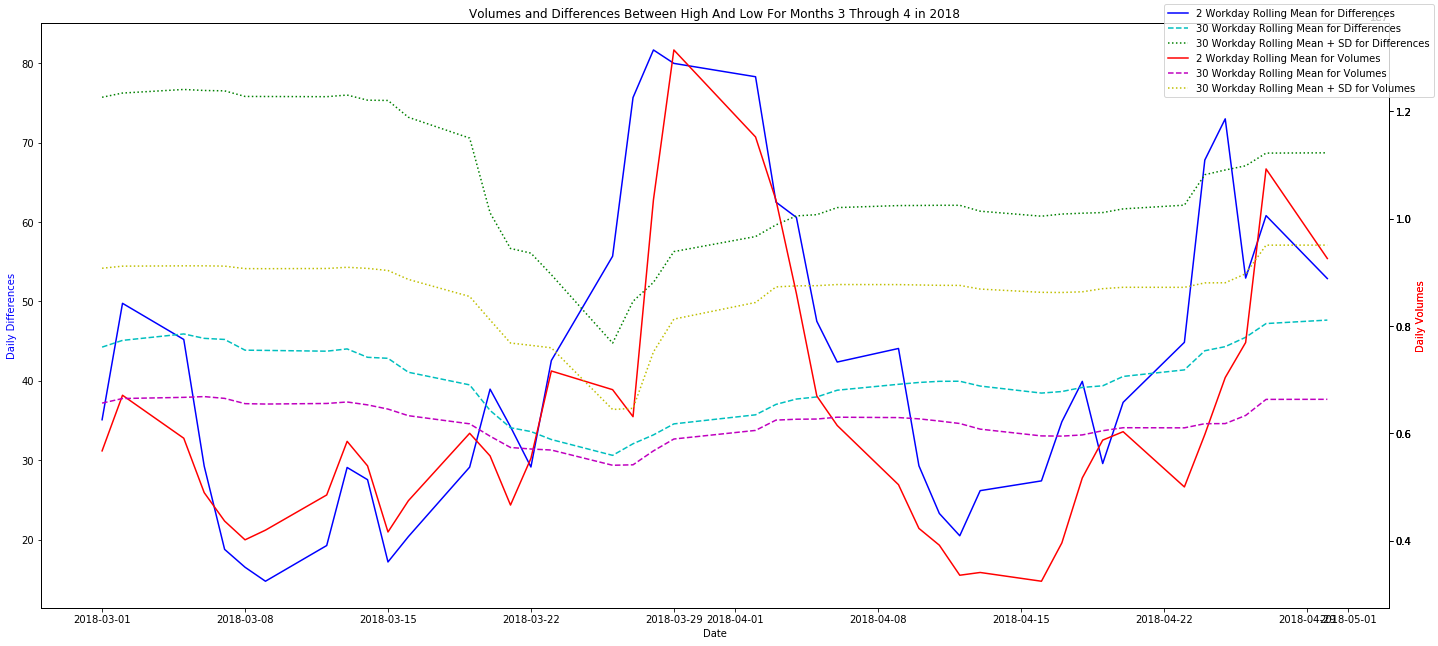

In [117]:
plot_amzn18_months_diffs_and_volume4('High','Low', [2,30], [1,4], [3,4], sd=True)

30


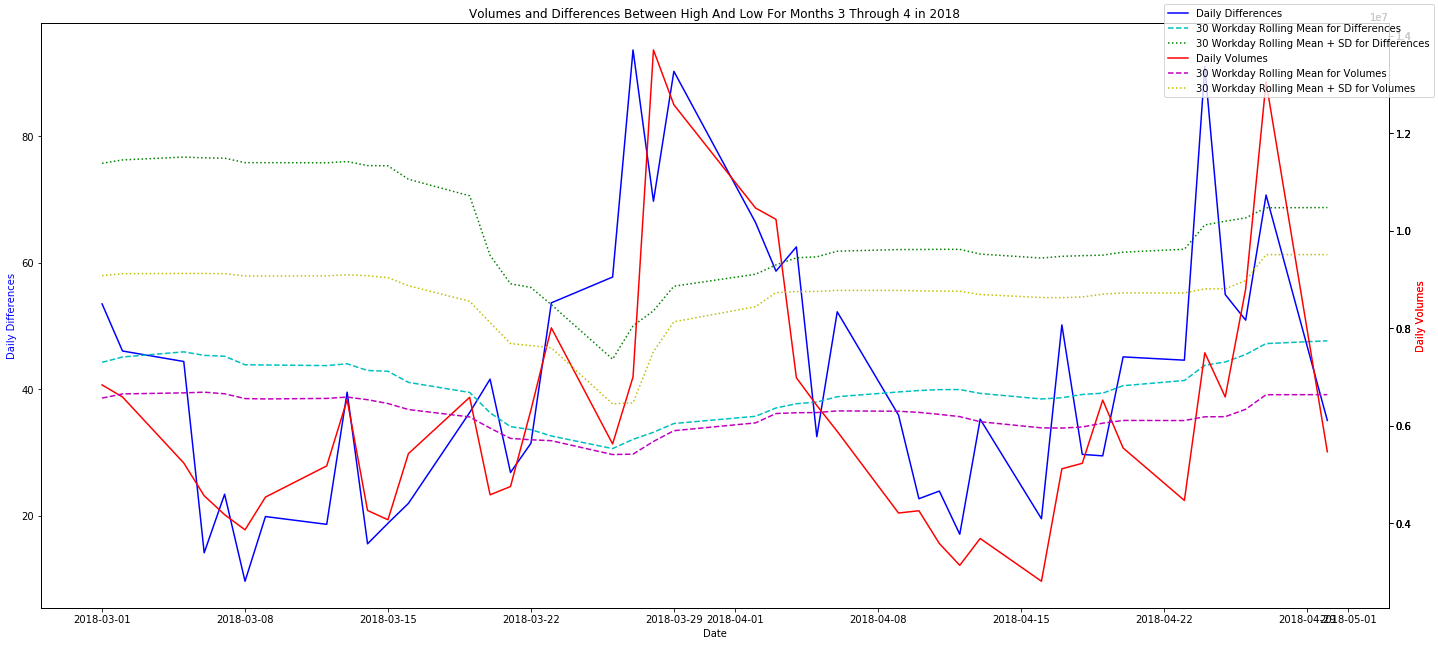

In [118]:
plot_amzn18_months_diffs_and_volume4('High','Low', [1,30], [1,4], [3,4], sd=True)

In [105]:
#need to make comments in function(s) 
#add option for including SD/SD+Mean and year


20


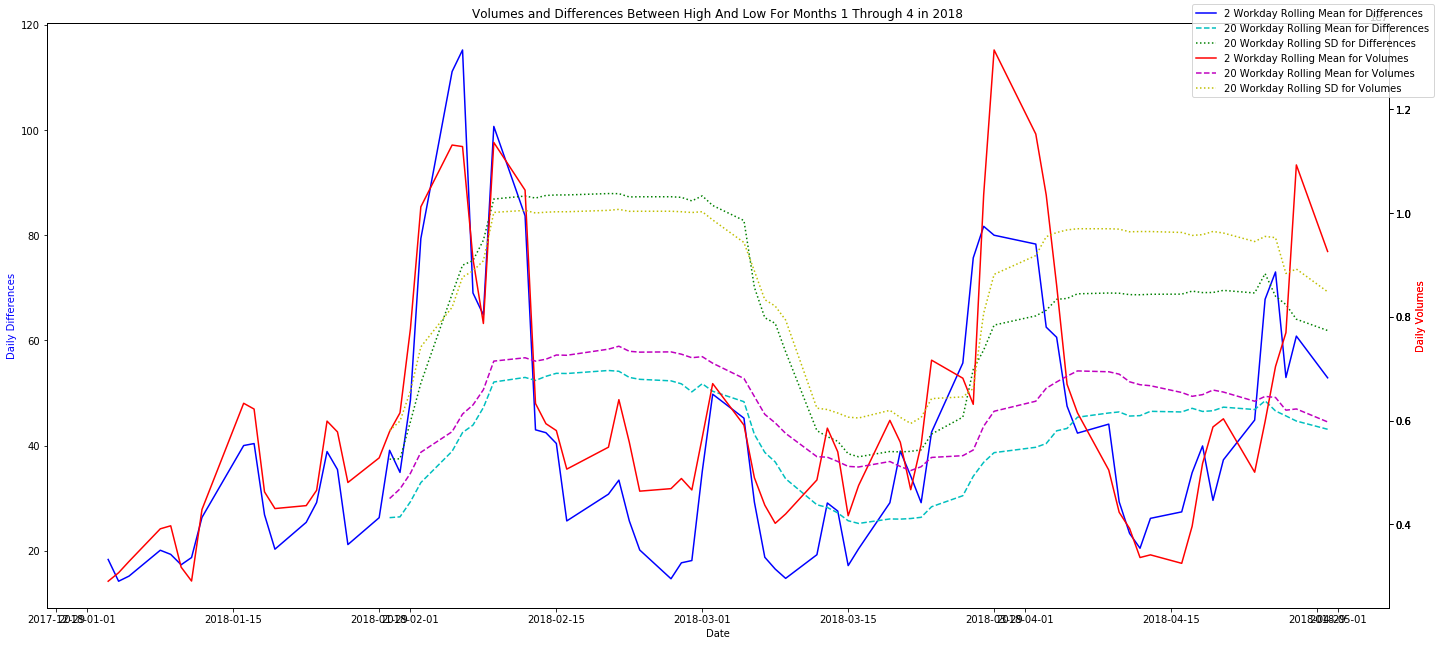

In [122]:
plot_amzn18_months_diffs_and_volume4('High','Low', [2,20], [1,4], sd=True)

30


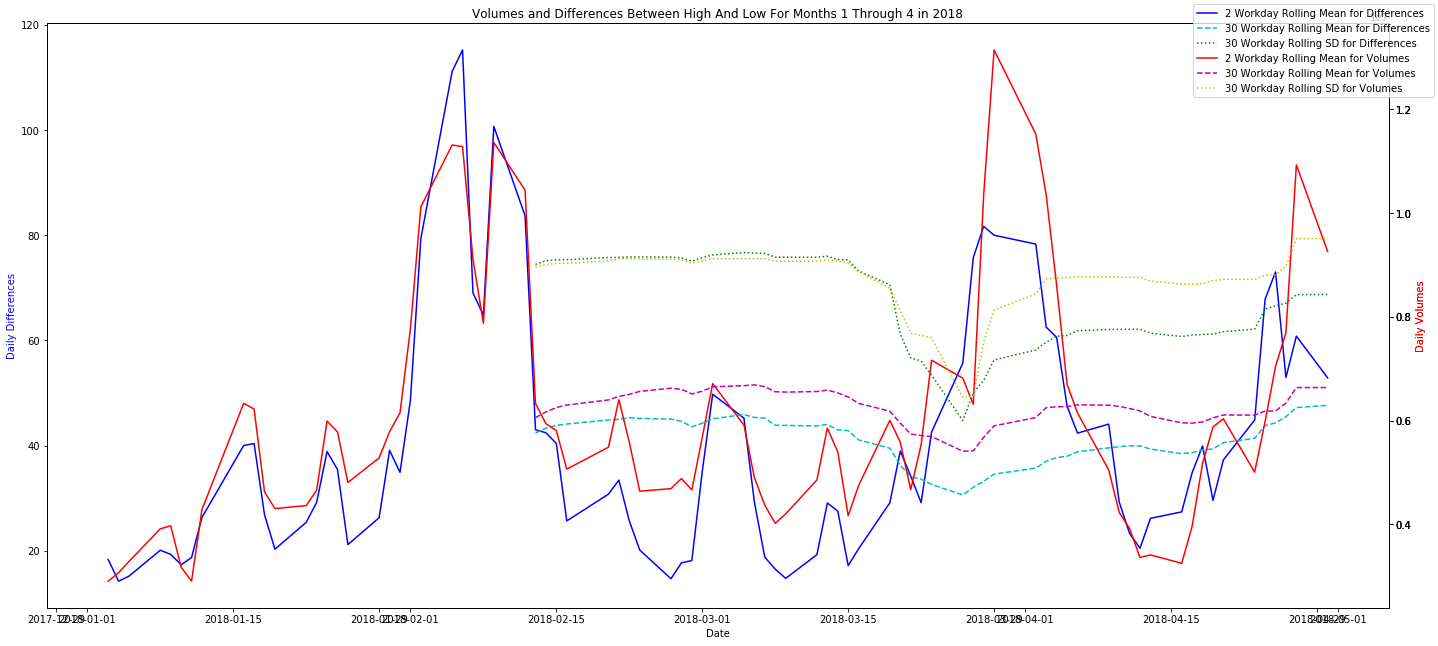

In [123]:
plot_amzn18_months_diffs_and_volume4('High','Low', [2,30], [1,4], sd=True)

In [135]:
def plot_amzn_yr_months_diffs_and_volume4(col1, col2, rollings = [1], year = 2018, months = [1,12], months2=[], sd=False, figsize=(20,9)):
    #plt.figure(figsize=figsize)
    #plt.title('Difference and Volumes Between '+col1+' And '+col2+' For Months ' +str(months[0])+ ' Through ' +str(months[1])+ ' in 2018')
    amzn_month = dt_amzn[((dt_amzn.index.month >= months[0]) & (dt_amzn.index.month <= months[1])) & (dt_amzn.index.year == year)]
    diffs = amzn_month[col1].sub(amzn_month[col2])
    vols = amzn_month['Volume']
    fig, ax1 = plt.subplots(figsize=figsize)
    color = ['b', 'r', 'c', 'm', 'g', 'y']
    labels1 = []
    labels2 = []
    for i in rollings:
        if months2 == []:
            ax1.set_xlabel('Date')

            ax1.set_ylabel('Daily Differences', color= color[0])
            if i == 1:
                ax1.plot(diffs, color = color[0])
                labels1.append('Daily Differences')
            else:
                k = rollings.index(i)* 2
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax1.plot(diffs.rolling(i).mean(), linestyle=style, color = color[k])
                labels1.append(str(i) + ' Workday Rolling Mean for Differences')

            ax2 = ax1.twinx()

            ax2.set_ylabel('Daily Volumes', color=color[1])
            if i == 1:
                ax2.plot(vols,color = color[1])
                labels2.append('Daily Volumes')
            else:
                k = rollings.index(i)*2 + 1
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax2.plot(vols.rolling(i).mean(), linestyle=style, color = color[k])
                labels2.append(str(i) + ' Workday Rolling Mean for Volumes')
                
        else:
            ax1.set_xlabel('Date')

            ax1.set_ylabel('Daily Differences', color= color[0])
            if i == 1:
                ax1.plot(diffs[(diffs.index.month >= months2[0]) & (diffs.index.month <= months2[1])], color = color[0])
                labels1.append('Daily Differences')
            else:
                k = rollings.index(i)* 2
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax1.plot(diffs.rolling(i).mean()[(diffs.index.month >= months2[0]) & (diffs.index.month <= months2[1])], linestyle=style, color = color[k])
                labels1.append(str(i) + ' Workday Rolling Mean for Differences')
                
            ax2 = ax1.twinx()

            ax2.set_ylabel('Daily Volumes', color=color[1])
            if i == 1:
                ax2.plot(vols[(vols.index.month >= months2[0]) & (vols.index.month <= months2[1])],color = color[1])
                labels2.append('Daily Volumes')
            else:
                k = rollings.index(i)*2 + 1
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax2.plot(vols.rolling(i).mean()[(vols.index.month >= months2[0]) & (vols.index.month <= months2[1])], linestyle=style, color = color[k])
                labels2.append(str(i) + ' Workday Rolling Mean for Volumes')
           
        if rollings.index(i) == 0:
            y_limits1 = ax1.get_ylim()
            y_limits2 = ax2.get_ylim()
        else:
            ax1.set_ylim(y_limits1[0],y_limits1[1])
            ax2.set_ylim(y_limits2[0],y_limits2[1])
     
    #for including rolling sd + rolling mean
    if sd == True:
        if i > 1:
            print(i)
            if months2 == []:
                ax1.plot(diffs.rolling(i).mean() + diffs.rolling(i).std(), linestyle=':', color = color[4])
                labels1.append(str(i) + ' Workday Rolling SD for Differences')
                ax2 = ax1.twinx()
                ax2.plot(vols.rolling(i).mean() + vols.rolling(i).std(), linestyle=':', color = color[5])
                labels2.append(str(i) + ' Workday Rolling SD for Volumes')
            else:
                ax1.plot(diffs.rolling(i).mean()[(diffs.index.month >= months2[0]) & (diffs.index.month <= months2[1])] + diffs.rolling(i).std()[(diffs.index.month >= months2[0]) & (diffs.index.month <= months2[1])], linestyle=':', color = color[4])
                labels1.append(str(i) + ' Workday Rolling Mean + SD for Differences')
                ax2 = ax1.twinx()
                ax2.plot(vols.rolling(i).mean()[(vols.index.month >= months2[0]) & (vols.index.month <= months2[1])] + vols.rolling(i).std()[(vols.index.month >= months2[0]) & (vols.index.month <= months2[1])], linestyle=':', color = color[5])
                labels2.append(str(i) + ' Workday Rolling Mean + SD for Volumes')          
            ax1.set_ylim(y_limits1[0],y_limits1[1])
            ax2.set_ylim(y_limits2[0],y_limits2[1])
    
    labels = labels1 + labels2
    fig.legend(labels=labels)
    fig.tight_layout()  
    if months2 == []:
        plt.title('Volumes and Differences Between '+col1+' And '+col2+' For Months ' +str(months[0])+ ' Through ' +str(months[1])+ ' in ' +str(year))
    else:
        plt.title('Volumes and Differences Between '+col1+' And '+col2+' For Months ' +str(months2[0])+ ' Through ' +str(months2[1])+ ' in '+str(year))
    plt.show()

30


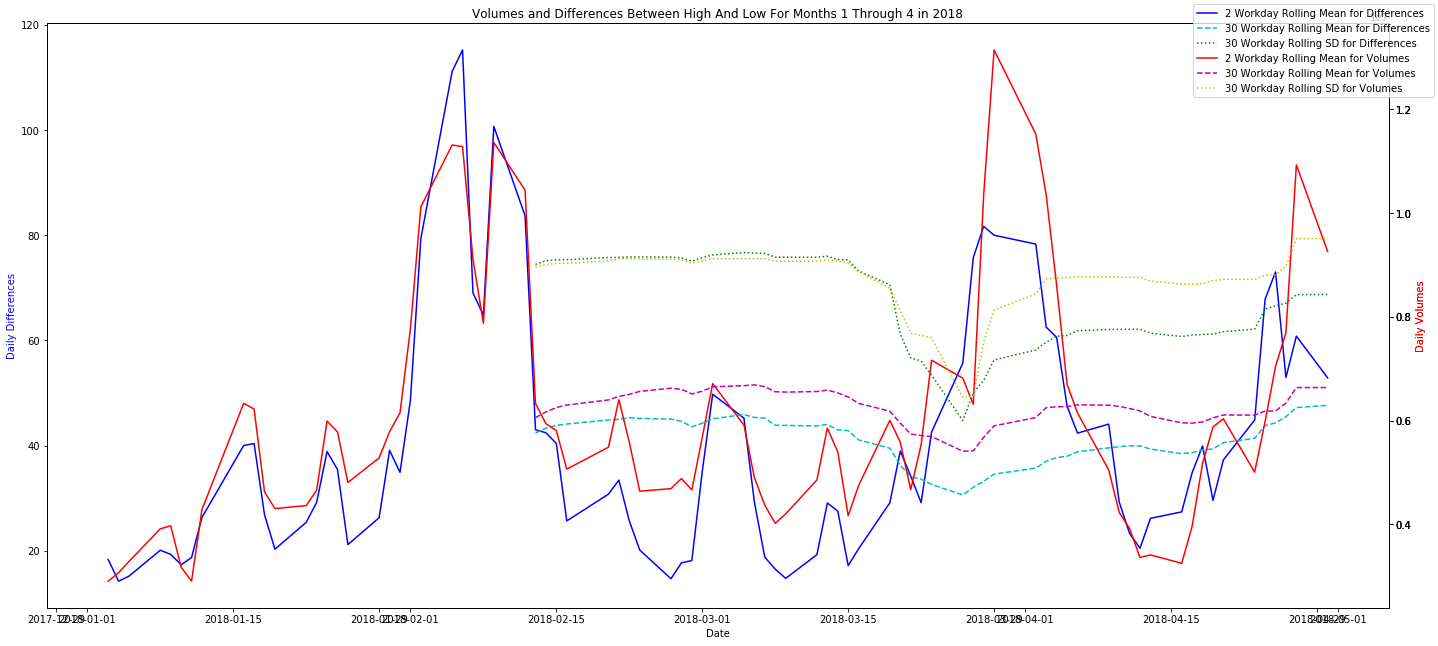

In [138]:
plot_amzn_yr_months_diffs_and_volume4('High','Low', [2,30], 2018, [1,4], sd=True)

In [139]:
def plot_amzn_yr_months_diffs_and_volume3(col1, col2, rollings = [1], year = 2018, months = [1,12], months2=[], sd=False, figsize=(20,9)):
    #plt.figure(figsize=figsize)
    #plt.title('Difference and Volumes Between '+col1+' And '+col2+' For Months ' +str(months[0])+ ' Through ' +str(months[1])+ ' in 2018')
    amzn_month = dt_amzn[((dt_amzn.index.month >= months[0]) & (dt_amzn.index.month <= months[1])) & (dt_amzn.index.year == year)]
    diffs = amzn_month[col1].sub(amzn_month[col2])
    vols = amzn_month['Volume']
    fig, ax1 = plt.subplots(figsize=figsize)
    color = ['b', 'r', 'c', 'm', 'g', 'y']
    labels1 = []
    labels2 = []
    for i in rollings:
        if months2 == []:
            ax1.set_xlabel('Date')

            ax1.set_ylabel('Daily Differences', color= color[0])
            if i == 1:
                ax1.plot(diffs, color = color[0])
                labels1.append('Daily Differences')
            else:
                k = rollings.index(i)* 2
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax1.plot(diffs.rolling(i).mean(), linestyle=style, color = color[k])
                labels1.append(str(i) + ' Workday Rolling Mean for Differences')

            ax2 = ax1.twinx()

            ax2.set_ylabel('Daily Volumes', color=color[1])
            if i == 1:
                ax2.plot(vols,color = color[1])
                labels2.append('Daily Volumes')
            else:
                k = rollings.index(i)*2 + 1
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax2.plot(vols.rolling(i).mean(), linestyle=style, color = color[k])
                labels2.append(str(i) + ' Workday Rolling Mean for Volumes')
                
        else:
            ax1.set_xlabel('Date')

            ax1.set_ylabel('Daily Differences', color= color[0])
            if i == 1:
                ax1.plot(diffs[(diffs.index.month >= months2[0]) & (diffs.index.month <= months2[1])], color = color[0])
                labels1.append('Daily Differences')
            else:
                k = rollings.index(i)* 2
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax1.plot(diffs.rolling(i).mean()[(diffs.index.month >= months2[0]) & (diffs.index.month <= months2[1])], linestyle=style, color = color[k])
                labels1.append(str(i) + ' Workday Rolling Mean for Differences')
                
            ax2 = ax1.twinx()

            ax2.set_ylabel('Daily Volumes', color=color[1])
            if i == 1:
                ax2.plot(vols[(vols.index.month >= months2[0]) & (vols.index.month <= months2[1])],color = color[1])
                labels2.append('Daily Volumes')
            else:
                k = rollings.index(i)*2 + 1
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax2.plot(vols.rolling(i).mean()[(vols.index.month >= months2[0]) & (vols.index.month <= months2[1])], linestyle=style, color = color[k])
                labels2.append(str(i) + ' Workday Rolling Mean for Volumes')
           
        if rollings.index(i) == 0:
            y_limits1 = ax1.get_ylim()
            y_limits2 = ax2.get_ylim()
        else:
            ax1.set_ylim(y_limits1[0],y_limits1[1])
            ax2.set_ylim(y_limits2[0],y_limits2[1])
     
    #for including rolling sd
    if sd == True:
        if i > 1:
            print(i)
            if months2 == []:
                ax1.plot(diffs.rolling(i).std(), linestyle=':', color = color[4])
                labels1.append(str(i) + ' Workday Rolling SD for Differences')
                ax2 = ax1.twinx()
                ax2.plot(vols.rolling(i).std(), linestyle=':', color = color[5])
                labels2.append(str(i) + ' Workday Rolling SD for Volumes')
            else:
                ax1.plot(diffs.rolling(i).std()[(diffs.index.month >= months2[0]) & (diffs.index.month <= months2[1])], linestyle=':', color = color[4])
                labels1.append(str(i) + ' Workday Rolling SD for Differences')
                ax2 = ax1.twinx()
                ax2.plot(vols.rolling(i).std()[(vols.index.month >= months2[0]) & (vols.index.month <= months2[1])], linestyle=':', color = color[5])
                labels2.append(str(i) + ' Workday Rolling SD for Volumes')          
            ax1.set_ylim(y_limits1[0],y_limits1[1])
            ax2.set_ylim(y_limits2[0],y_limits2[1])
    
    labels = labels1 + labels2
    fig.legend(labels=labels)
    fig.tight_layout()  
    if months2 == []:
        plt.title('Volumes and Differences Between '+col1+' And '+col2+' For Months ' +str(months[0])+ ' Through ' +str(months[1])+ ' in ' +str(year))
    else:
        plt.title('Volumes and Differences Between '+col1+' And '+col2+' For Months ' +str(months2[0])+ ' Through ' +str(months2[1])+ ' in '+str(year))
    plt.show()

In [174]:
#same as other one but only calculates sd, not mean + sd
def plot_amzn_yr_months_diffs_and_volume2(col1, col2, start, end, rollings = [1], display=[], sd=False, figsize=(20,9)):
    start_date = dt_amzn.index[(dt_amzn.index.month == start[0]) & (dt_amzn.index.year == start[1])].min().date()
    end_date = dt_amzn.index[(dt_amzn.index.month == end[0]) & (dt_amzn.index.year == end[1])].max().date()
    amzn_period = dt_amzn.loc[start_date:end_date,:]
    diffs = amzn_period[col1].sub(amzn_period[col2])
    vols = amzn_period['Volume']
    fig, ax1 = plt.subplots(figsize=figsize)
    color = ['b', 'r', 'c', 'm', 'g', 'y']
    labels1 = []
    labels2 = []
    for i in rollings:
        if display == []:
            ax1.set_xlabel('Date')

            ax1.set_ylabel('Daily Differences', color= color[0])
            if i == 1:
                ax1.plot(diffs, color = color[0])
                labels1.append('Daily Differences')
            else:
                k = rollings.index(i)* 2
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax1.plot(diffs.rolling(i).mean(), linestyle=style, color = color[k])
                labels1.append(str(i) + ' Workday Rolling Mean for Differences')

            ax2 = ax1.twinx()

            ax2.set_ylabel('Daily Volumes', color=color[1])
            if i == 1:
                ax2.plot(vols,color = color[1])
                labels2.append('Daily Volumes')
            else:
                k = rollings.index(i)*2 + 1
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax2.plot(vols.rolling(i).mean(), linestyle=style, color = color[k])
                labels2.append(str(i) + ' Workday Rolling Mean for Volumes')
                
        else:
            display_date = dt_amzn.index[(dt_amzn.index.month == display[0]) & (dt_amzn.index.year == display[1])].min().date()
            
            ax1.set_xlabel('Date')

            ax1.set_ylabel('Daily Differences', color= color[0])
            if i == 1:
                ax1.plot(diffs[(diffs.index.month >= display[0]) & (diffs.index.year >= display[1])], color = color[0])
                labels1.append('Daily Differences')
            else:
                k = rollings.index(i)* 2
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax1.plot(diffs.rolling(i).mean()[(diffs.index.month >= display[0]) & (diffs.index.year >= display[1])], linestyle=style, color = color[k])
                labels1.append(str(i) + ' Workday Rolling Mean for Differences')
                
            ax2 = ax1.twinx()

            ax2.set_ylabel('Daily Volumes', color=color[1])
            if i == 1:
                ax2.plot(vols[(vols.index.month >= display[0]) & (vols.index.year >= display[1])],color = color[1])
                labels2.append('Daily Volumes')
            else:
                k = rollings.index(i)*2 + 1
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax2.plot(vols.rolling(i).mean()[(vols.index.month >= display[0]) & (vols.index.year >= display[1])], linestyle=style, color = color[k])
                labels2.append(str(i) + ' Workday Rolling Mean for Volumes')
           
        if rollings.index(i) == 0:
            y_limits1 = ax1.get_ylim()
            y_limits2 = ax2.get_ylim()
        else:
            ax1.set_ylim(y_limits1[0],y_limits1[1])
            ax2.set_ylim(y_limits2[0],y_limits2[1])
     
    #for including rolling sd
    if sd == True:
        if i > 1:
            if display == []:
                ax1.plot(diffs.rolling(i).std(), linestyle=':', color = color[4])
                labels1.append(str(i) + ' Workday Rolling SD for Differences')
                ax2 = ax1.twinx()
                ax2.plot(vols.rolling(i).std(), linestyle=':', color = color[5])
                labels2.append(str(i) + ' Workday Rolling SD for Volumes')
            else:
                ax1.plot(diffs.rolling(i).std()[(diffs.index.month >= display[0]) & (diffs.index.year >= display[1])], linestyle=':', color = color[4])
                labels1.append(str(i) + ' Workday Rolling SD for Differences')
                ax2 = ax1.twinx()
                ax2.plot(vols.rolling(i).std()[(vols.index.month >= display[0]) & (vols.index.year >= display[1])], linestyle=':', color = color[5])
                labels2.append(str(i) + ' Workday Rolling SD for Volumes')          
            ax1.set_ylim(y_limits1[0],y_limits1[1])
            ax2.set_ylim(y_limits2[0],y_limits2[1])
    
    labels = labels1 + labels2
    fig.legend(labels=labels)
    fig.tight_layout()  
    if display == []:
        plt.title('Volumes and Differences Between '+col1+' And '+col2+' For '+str(start_date)+' Through ' +str(end_date))
    else:
        plt.title('Volumes and Differences Between '+col1+' And '+col2+' For ' +str(display_date)+ ' Through '+str(end_date))
    plt.show()

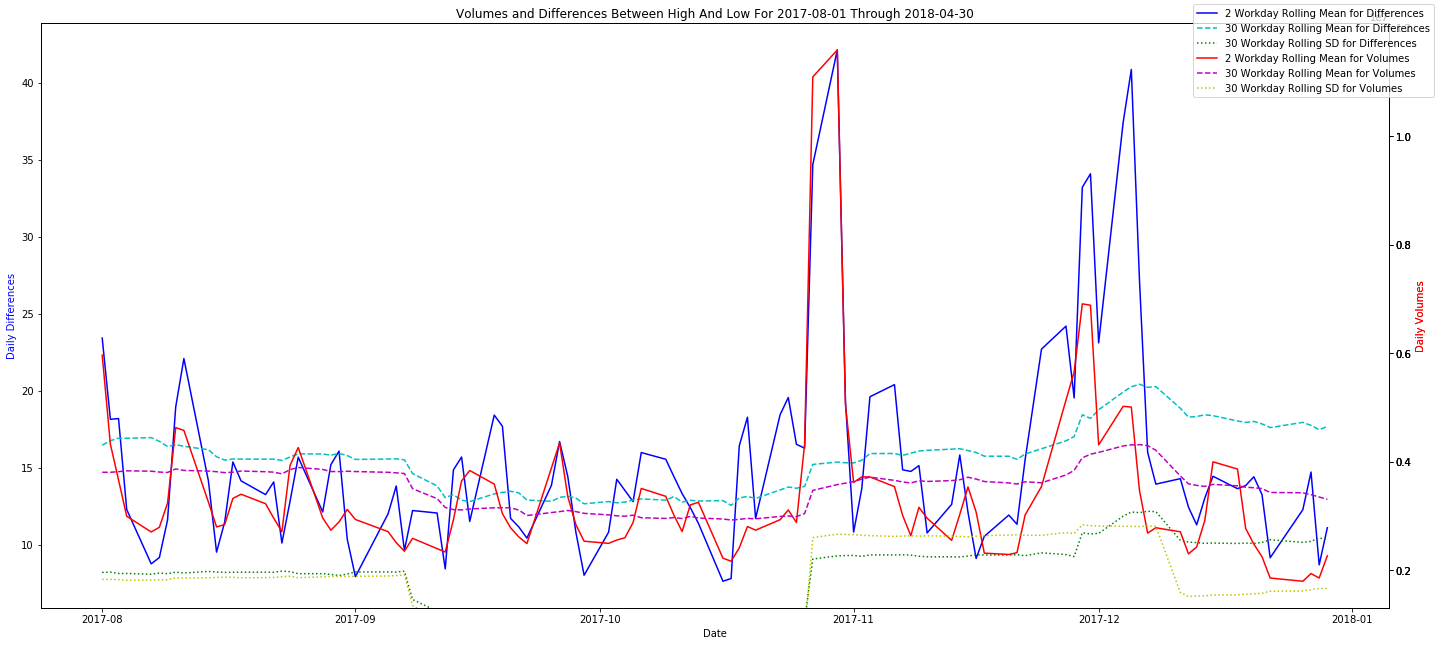

In [175]:
plot_amzn_yr_months_diffs_and_volume2('High', 'Low', [6,2017], [4,2018], [2,30], display=[8,2017],sd=True)

* "col1" is the name of the column that will be subtracted from "col2"
 * Input is a string
* "start" is the earliest month and year that will be looked at
* "end" is the last month and year that will be looked at
 * the input format for "start" and "end" is \[month #, year #\]
* "rollings" is the period length that rolling averages with me calculated at
 * defaults to \[1\] which represents daily values without rolling
* "display" is the month and year that the graph will begin at
 * rolling values will still use data from before "display"'s date if required
 * the input format is the same as "start" and "end"
* if "sd = True", a sum of the rolling mean and rolling standard deviation will be calculated
 * this will use the final entry in "rollings"
* "figsize" is the size of the graph

In [177]:
def plot_amzn_yr_months_diffs_and_volume(col1, col2, start, end, rollings = [1], display=[], sd=False, figsize=(20,9)):

    #Finds the first date that the data has during the "start" month and year, and finds the last date during the "end" month and year
    start_date = dt_amzn.index[(dt_amzn.index.month == start[0]) & (dt_amzn.index.year == start[1])].min().date()
    end_date = dt_amzn.index[(dt_amzn.index.month == end[0]) & (dt_amzn.index.year == end[1])].max().date()
    amzn_period = dt_amzn.loc[start_date:end_date,:]
    diffs = amzn_period[col1].sub(amzn_period[col2]) #shorthand
    vols = amzn_period['Volume'] #shorthand
    
    fig, ax1 = plt.subplots(figsize=figsize)
    color = ['b', 'r', 'c', 'm', 'g', 'y']
    labels1 = [] #Labels for Differences trends
    labels2 = [] #Labels for Volumes trends
    
    #creates 2 lines (one for Differences, one for Volumes) for each entry in "rollings"
    #In order to overlay trends for Differences and trends for Volumes, two axes are created 
    #Volumes lines correspond to the right y-axis
    for i in rollings:
        
        #if no "display" date is specified, the graph will begin at the "start" date
        if display == []:
            ax1.set_xlabel('Date')
            #Differences lines correspond to the left y-axis
            ax1.set_ylabel('Daily Differences', color= color[0])
            #A specific label is used if looking at daily values
            if i == 1:
                ax1.plot(diffs, color = color[0])
                labels1.append('Daily Differences')
            else:
                k = rollings.index(i)* 2
                if k <= 1:
                    style='-' #If daily values aren't being looked at, the first rolling mean line will be solid
                else:
                    style='--' #Otherwise all rolling mean lines are dashed
                ax1.plot(diffs.rolling(i).mean(), linestyle=style, color = color[k]) #Each line (of the first 6) is a different color
                labels1.append(str(i) + ' Workday Rolling Mean for Differences')

            ax2 = ax1.twinx()

            #Volumes lines correspond to the left y-axis
            ax2.set_ylabel('Daily Volumes', color=color[1])
            if i == 1:
                ax2.plot(vols,color = color[1])
                labels2.append('Daily Volumes')
            else:
                k = rollings.index(i)*2 + 1
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax2.plot(vols.rolling(i).mean(), linestyle=style, color = color[k])
                labels2.append(str(i) + ' Workday Rolling Mean for Volumes')
                
        #If "display" date is given, graph (and lines) will begin there 
        else:
            display_date = dt_amzn.index[(dt_amzn.index.month == display[0]) & (dt_amzn.index.year == display[1])].min().date()
            
            ax1.set_xlabel('Date')

            ax1.set_ylabel('Daily Differences', color= color[0])
            if i == 1:
                ax1.plot(diffs[(diffs.index.month >= display[0]) & (diffs.index.year >= display[1])], color = color[0])
                labels1.append('Daily Differences')
            else:
                k = rollings.index(i)* 2
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax1.plot(diffs.rolling(i).mean()[(diffs.index.month >= display[0]) & (diffs.index.year >= display[1])], linestyle=style, color = color[k])
                labels1.append(str(i) + ' Workday Rolling Mean for Differences')
                
            ax2 = ax1.twinx()

            ax2.set_ylabel('Daily Volumes', color=color[1])
            if i == 1:
                ax2.plot(vols[(vols.index.month >= display[0]) & (vols.index.year >= display[1])],color = color[1])
                labels2.append('Daily Volumes')
            else:
                k = rollings.index(i)*2 + 1
                if k <= 1:
                    style='-'
                else:
                    style='--'
                ax2.plot(vols.rolling(i).mean()[(vols.index.month >= display[0]) & (vols.index.year >= display[1])], linestyle=style, color = color[k])
                labels2.append(str(i) + ' Workday Rolling Mean for Volumes')
        
        #For each axis: takes the y-axis boundaries of the first line plotted and plots the following lines of that axis using those boundaries  
        if rollings.index(i) == 0:
            y_limits1 = ax1.get_ylim()
            y_limits2 = ax2.get_ylim()
        else:
            ax1.set_ylim(y_limits1[0],y_limits1[1])
            ax2.set_ylim(y_limits2[0],y_limits2[1])
     
    #For including rolling mean + rolling sd
    #outside of "rollings" for loop so will only use the final "rollings" value
    if sd == True:
        if i > 1: #Requires there being rolling periods
            if display == []:
                #mean+sd lines will be dotted
                ax1.plot(diffs.rolling(i).mean() + diffs.rolling(i).std(), linestyle=':', color = color[4])
                labels1.append(str(i) + ' Workday Rolling SD for Differences')
                ax2 = ax1.twinx()
                ax2.plot(vols.rolling(i).mean() + vols.rolling(i).std(), linestyle=':', color = color[5])
                labels2.append(str(i) + ' Workday Rolling SD for Volumes')
            else:
                ax1.plot(diffs.rolling(i).mean()[(diffs.index.month >= display[0]) & (diffs.index.year >= display[1])] + diffs.rolling(i).std()[(diffs.index.month >= display[0]) & (diffs.index.year >= display[1])], linestyle=':', color = color[4])
                labels1.append(str(i) + ' Workday Rolling SD for Differences')
                ax2 = ax1.twinx()
                ax2.plot(vols.rolling(i).mean()[(vols.index.month >= display[0]) & (vols.index.year >= display[1])] + vols.rolling(i).std()[(vols.index.month >= display[0]) & (vols.index.year >= display[1])], linestyle=':', color = color[5])
                labels2.append(str(i) + ' Workday Rolling SD for Volumes')          
            ax1.set_ylim(y_limits1[0],y_limits1[1])
            ax2.set_ylim(y_limits2[0],y_limits2[1])
    
    labels = labels1 + labels2
    fig.legend(labels=labels) #Legend labels
    fig.tight_layout()  
    
    #Title will use "start" date if no "display" date is given
    #Otherwise uses "display" date
    if display == []:
        plt.title('Volumes and Differences Between '+col1+' And '+col2+' For '+str(start_date)+' Through ' +str(end_date))
    else:
        plt.title('Volumes and Differences Between '+col1+' And '+col2+' For ' +str(display_date)+ ' Through '+str(end_date))
    plt.show()

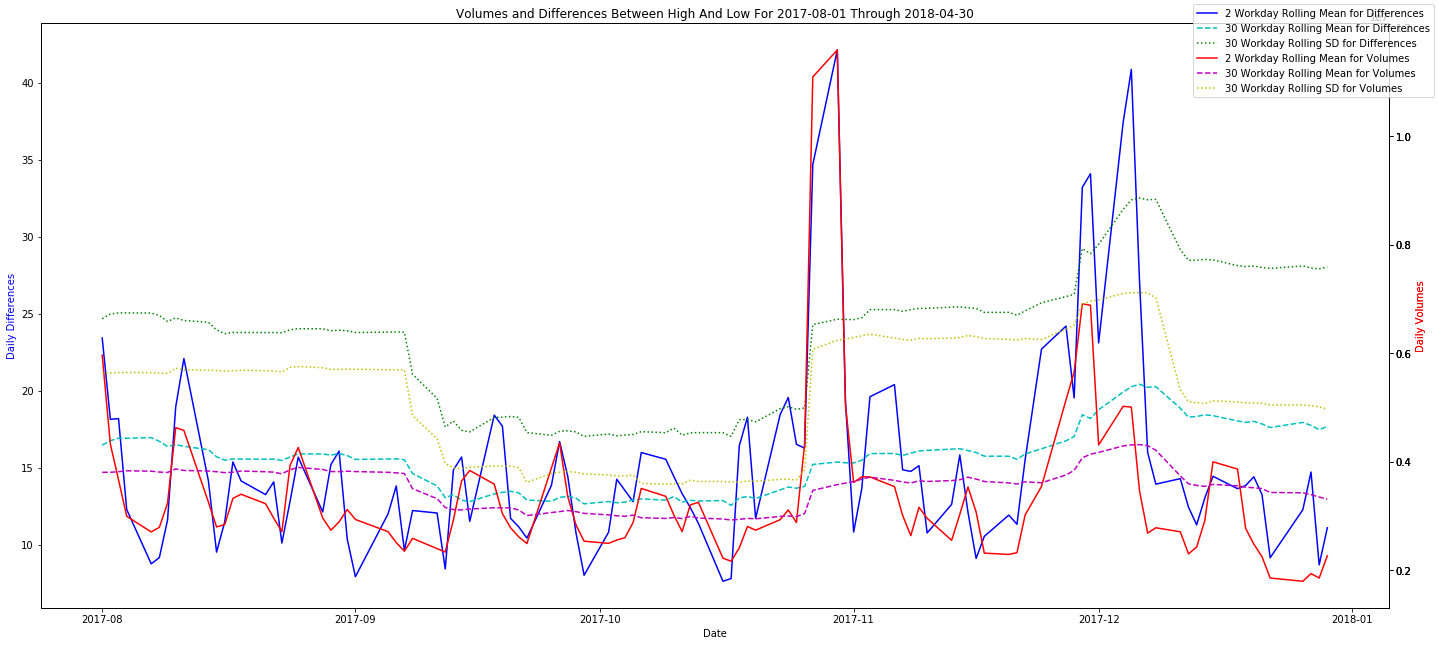

In [178]:
plot_amzn_yr_months_diffs_and_volume('High', 'Low', [6,2017], [4,2018], [2,30], display=[8,2017],sd=True)